In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname('__file__')))
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.4.2"
os.environ['R_LANGUAGE'] = 'en_US.UTF-8'

In [2]:
%%capture
import os
from controller.injector import Injector
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
import json
if not rpackages.isinstalled('rugarch') or not rpackages.isinstalled('rmgarch'):
    raise RuntimeError('rugarch missing')

injector = Injector(conf_file=f'{os.getcwd()}{os.sep}config{os.sep}config.json')
injector.local_cache()

In [ ]:
#!pip install --upgrade yfinance pandas_datareader requests

In [3]:
#!pip install -q -r Requirements.txt

In [25]:
from model.names import IndexMeta as im
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from model.names import IndexMeta

def get_df_to_show(name, injector):
    for index in injector.indexes:
        if index.i_name == name:
            return index.df
    return {}

def plot_adj_close(name, injector):
    plt.figure(figsize=(12, 6))
    df = get_df_to_show(name, injector)
    plt.plot(df.index, df[im.ADJUSTED_CLOSE])
    plt.show()


sns.set_style("whitegrid")
def multi_plot_in_row(dfs: list[pd.DataFrame], info=IndexMeta.LOG_RETURN_PERCENTAGE,
                      fig_size=(20, 30), plot_names=None):
    if plot_names is None:
        plot_names = ["plot"]
    fig, axs = plt.subplots(len(dfs), 1, figsize=fig_size)
    i = 0
    for df in dfs:
        sns.lineplot(x=df.index, y=df[info], ax=axs[i], color='#2980b9')
        axs[i].set_title(f'{plot_names[i%len(plot_names)]}')
        i+=1
    plt.show()

In [26]:
from IPython.core.display import HTML

# Definire il CSS come stringa
css = """
    <style>
    /* Corpo della pagina */
    body {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        background-color: #f7f9fc;
        color: #2c3e50;
        margin: 0;
        padding: 0;
        line-height: 1.6;
    }

    /* Contenitore principale */
    .container {
        width: 80%;
        margin: 0 auto;
        padding: 40px;
    }

    /* Titoli */
    h1 {
        font-size: 40px;
        text-align: center;
        color: #2980b9;
        margin-bottom: 20px;
    }

    h2 {
        font-size: 30px;
        color: #2980b9;
        margin-top: 40px;
        border-bottom: 2px solid #2980b9;
        padding-bottom: 10px;
    }

    h3 {
        font-size: 24px;
        color: #34495e;
        margin-top: 20px;
    }

    /* Paragrafi */
    p {
        font-size: 18px;
        color: #34495e;
        margin-bottom: 20px;
    }

    /* Liste */
    ul {
        list-style-type: square;
        margin-left: 30px;
        margin-bottom: 20px;
    }

    li {
        font-size: 18px;
        color: #34495e;
    }

    /* Evidenziazione */
    .highlight {
        color: #e74c3c;
        font-weight: bold;
    }

    /* Sezioni */
    .section {
        margin-bottom: 40px;
    }

    .content {
        background-color: #ffffff;
        padding: 30px;
        border-radius: 8px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        margin-top: 20px;
    }

    /* Link */
    a {
        color: #2980b9;
        text-decoration: none;
        font-weight: bold;
    }

    a:hover {
        text-decoration: underline;
    }

    /* Footer */
    footer {
        text-align: center;
        padding: 20px;
        background-color: #2c3e50;
        color: white;
        font-size: 16px;
        margin-top: 40px;
    }
    /* Stile della tabella */
    .styled-table {
        width: 70%;
        margin: 20px auto;
        border-collapse: collapse;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        background-color: #ffffff;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 8px;
        border: 2px solid #2c3e50;  /* Bordo esterno più marcato */
    }

    /* Stile delle celle */
    .styled-table th, .styled-table td {
        border: 2px solid #2c3e50; /* Bordi più visibili */
        padding: 12px;
        text-align: center;
        font-size: 18px;
    }

    /* Colore intestazioni */
    .styled-table th {
        background-color: #2980b9;
        color: white;
        font-size: 20px;
        border: 2px solid #2c3e50;
    }

    /* Colore righe alternate */
    .styled-table tr:nth-child(even) {
        background-color: #f2f2f2;
    }

    /* Hover effetto */
    .styled-table tr:hover {
        background-color: #dfe6e9;
    }
</style>


"""

# Visualizzare il CSS
HTML(css)


In [27]:
paragraph_1 = """<h1>Progetto di Metodi Probabilistici e Statistici per Mercati Finanziari</h1>
<h2>Autore: Dissan Uddin Ahmed</h2>

<div class="content">
    <h2>Analisi Finanziaria Dei Mercati Nazionali</h2>
    <p>I mercati finanziari nazionali rappresentano un pilastro fondamentale dell’economia globale, riflettendo le dinamiche economiche, politiche e sociali di ciascun paese. Questo tipo di analisi aiuta gli investitori a gestire il rischio e capire quali titoli inserire nel proprio portafoglio finanziario. Si cerca di capire come la volatilità sia un parametro da tenere d'occhio quando si investe in borsa.</p>

    <div class="section">
        <h3>1) Analisi di mercato</h3>
        <p>La liquidità di un mercato finanziario si riferisce alla facilità con cui gli investitori possono comprare o vendere titoli finanziari senza causare significative fluttuazioni nei prezzi di mercato. Un mercato altamente liquido è caratterizzato da una maggiore attività di scambio di titoli, un elevato numero di partecipanti, un elevato volume di scambi giornalieri e una stretta differenza tra i prezzi di acquisto (offerta) e i prezzi di vendita (domanda), noti come spread.</p>
        <p>La liquidità è un importante fattore da considerare quando si decide di investire in un mercato finanziario.</p>
    </div>

    <div class="section">
        <h3>1.1) Entrata e Uscita mercato azionario</h3>
        <p>L'entrata e l'uscita dal mercato finanziario sono processi fondamentali per investitori e aziende. Un investitore entra nel mercato acquistando strumenti finanziari come azioni, obbligazioni o derivati, generalmente tramite un intermediario finanziario come una banca o un broker. La decisione di investire si basa su analisi di mercato e strategie di rendimento.</p>
        <p>Le aziende possono entrare nel mercato attraverso la quotazione in borsa (IPO), e uscire quando decidono di vendere i propri asset o quando non rispettano i requisiti di mercato.</p>
    </div>

    <div class="section">
        <h3>1.2) Liquidità del Mercato Azionario</h3>
        <p>La liquidità del mercato azionario si riferisce alla facilità con cui le azioni possono essere acquistate o vendute senza causare fluttuazioni significative nel loro prezzo. Ci sono due aspetti principali della liquidità:</p>
        <ul>
            <li><b>Liquidità immediata:</b> La capacità di eseguire ordini di acquisto o vendita a un prezzo vicino al valore di mercato senza influenzare il prezzo stesso.</li>
            <li><b>Profondità del mercato:</b> La quantità di ordini di acquisto e vendita a vari livelli di prezzo.</li>
        </ul>
        <p>Fattori che influenzano la liquidità includono il volume di scambi, la volatilità e la partecipazione degli investitori istituzionali.</p>
    </div>

    <div class="section">
        <h2>2) Estrazione dei dati</h2>
        <p>Sono stati scelti i mercati nazionali più importanti e il mercato nazionale italiano, un mercato più piccolo, per verificare alla fine dello studio, se c'è correlazione tra queste borse. I dati sono stati scaricati tramite la libreria Python <code>yfinance</code>, e comprendono la serie storica degli ultimi due anni degli indici delle seguenti borse:</p>
        <ol>
            <li>FTSE MIB</li>
            <li>Dow Jones</li>
            <li>NASDAQ</li>
            <li>Nikkei 225</li>
            <li>HANG SENG INDEX</li>
        </ol>
    </div>
</div>
"""
HTML(paragraph_1)

## Dati dei Mercati
In questa sezione si osservano i dataset che sono stati presi in considerazione ed i prezzi di chiusura rettificata delle varie borse.
### FTSE MIB

In [6]:
get_df_to_show('FTSE MIB', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,27409.0,27409.0,27575.0,27157.0,27524.0,542316600
2023-02-22,27102.0,27102.0,27389.0,26868.0,27362.0,672419600
2023-02-23,27278.0,27278.0,27449.0,27132.0,27181.0,560127200
2023-02-24,26986.0,26986.0,27413.0,26961.0,27377.0,531513900
2023-02-27,27444.0,27444.0,27542.0,27202.0,27215.0,491986500
...,...,...,...,...,...,...
2025-02-13,37908.0,37908.0,37908.0,37547.0,37770.0,1202663000
2025-02-14,37978.0,37978.0,38152.0,37836.0,37879.0,1370867400
2025-02-17,38328.0,38328.0,38423.0,37997.0,37998.0,802872800


### Dow Jones

In [7]:
get_df_to_show('Dow Jones', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,33129.589844,33129.589844,33699.691406,33115.738281,33699.691406,348320000
2023-02-22,33045.089844,33045.089844,33245.968750,32948.269531,33169.328125,321910000
2023-02-23,33153.910156,33153.910156,33272.398438,32795.671875,33175.390625,288120000
2023-02-24,32816.921875,32816.921875,32999.191406,32643.480469,32999.191406,277120000
2023-02-27,32889.089844,32889.089844,33189.281250,32814.179688,32906.160156,243660000
...,...,...,...,...,...,...
2025-02-12,44368.558594,44368.558594,44467.210938,44104.480469,44357.699219,444470000
2025-02-13,44711.429688,44711.429688,44768.261719,44366.621094,44425.941406,513960000
2025-02-14,44546.078125,44546.078125,44769.050781,44498.960938,44720.988281,474570000


### NASDAQ

In [8]:
get_df_to_show('NASDAQ', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,11492.299805,11492.299805,11684.139648,11491.179688,11640.370117,5002540000
2023-02-22,11507.070312,11507.070312,11582.519531,11445.169922,11517.200195,4671270000
2023-02-23,11590.400391,11590.400391,11638.980469,11432.580078,11636.929688,4714580000
2023-02-24,11394.940430,11394.940430,11434.360352,11334.469727,11404.179688,4432650000
2023-02-27,11466.980469,11466.980469,11565.230469,11444.599609,11517.190430,4494000000
...,...,...,...,...,...,...
2025-02-12,19649.949219,19649.949219,19682.509766,19415.480469,19436.509766,7946550000
2025-02-13,19945.640625,19945.640625,19952.169922,19675.869141,19696.919922,8414510000
2025-02-14,20026.769531,20026.769531,20045.759766,19932.150391,19956.820312,7995720000


### Nikkei 225

In [9]:
get_df_to_show('Nikkei 225', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,27473.099609,27473.099609,27538.289062,27359.119141,27486.089844,61600000
2023-02-22,27104.320312,27104.320312,27300.529297,27046.080078,27265.990234,74700000
2023-02-24,27453.480469,27453.480469,27465.900391,27128.320312,27144.720703,76000000
2023-02-27,27423.960938,27423.960938,27456.220703,27292.740234,27322.730469,59400000
2023-02-28,27445.560547,27445.560547,27585.169922,27400.359375,27515.339844,86300000
...,...,...,...,...,...,...
2025-02-13,39461.468750,39461.468750,39581.468750,39112.171875,39225.500000,130400000
2025-02-14,39149.429688,39149.429688,39543.929688,39133.941406,39419.250000,132900000
2025-02-17,39174.250000,39174.250000,39238.750000,39021.230469,39094.089844,111300000


### HANG SENG INDEX

In [6]:
get_df_to_show('HANG SENG INDEX', injector)

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-02-21,20529.490234,20529.490234,20941.300781,20503.050781,20859.500000,2004601100
2023-02-22,20423.839844,20423.839844,20620.980469,20344.859375,20512.490234,1766388300
2023-02-23,20351.349609,20351.349609,20601.220703,20323.240234,20339.150391,1729748400
2023-02-24,20010.039062,20010.039062,20233.640625,20006.779297,20223.669922,2061880100
2023-02-27,19943.509766,19943.509766,20086.529297,19804.560547,19821.029297,1897627300
...,...,...,...,...,...,...
2025-02-13,21814.369141,21814.369141,22523.570312,21735.560547,21958.689453,6487200000
2025-02-14,22620.330078,22620.330078,22620.330078,22027.070312,22027.070312,6057000000
2025-02-17,22616.230469,22616.230469,22977.250000,22319.320312,22755.060547,6736200000


### Grafico delle chiusure rettificate

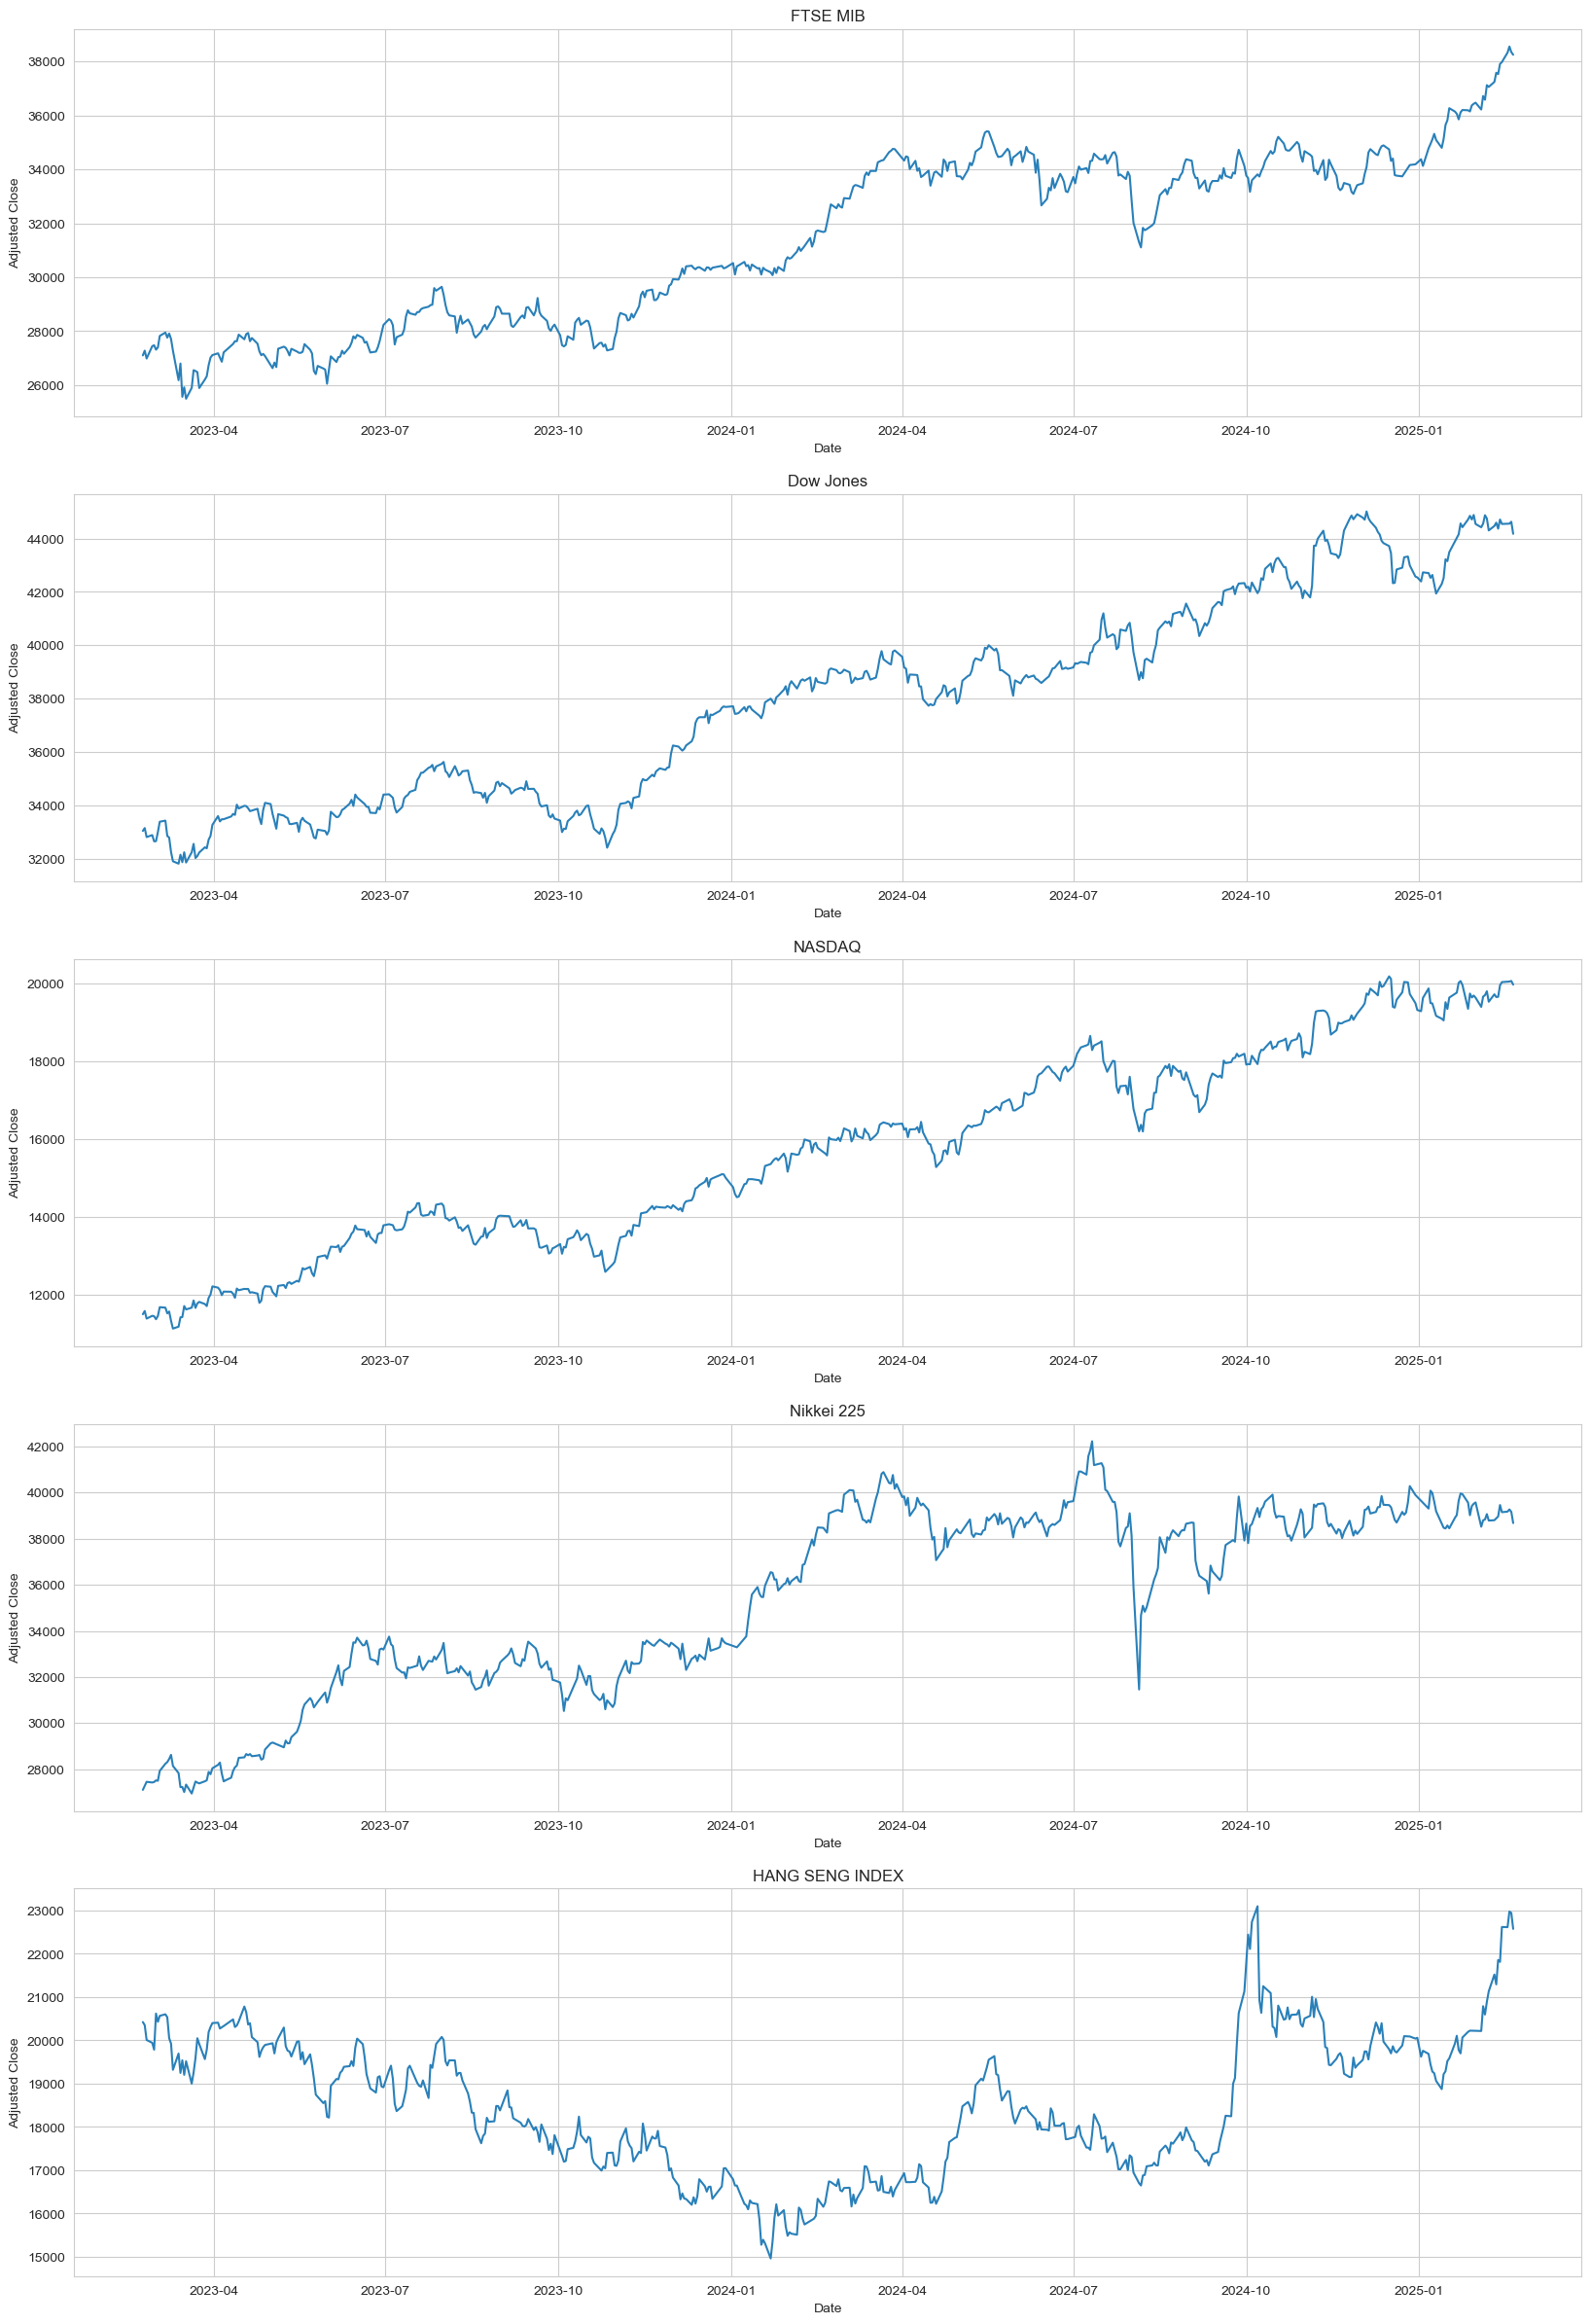

In [28]:
dfs_adj_closes = []
for index in injector.indexes:
    dfs_adj_closes.append(index.df)
multi_plot_in_row(dfs=dfs_adj_closes, plot_names=injector.get_indexes_names(), info=IndexMeta.ADJUSTED_CLOSE)

### Grafifo dei rendimenti logaritmici%

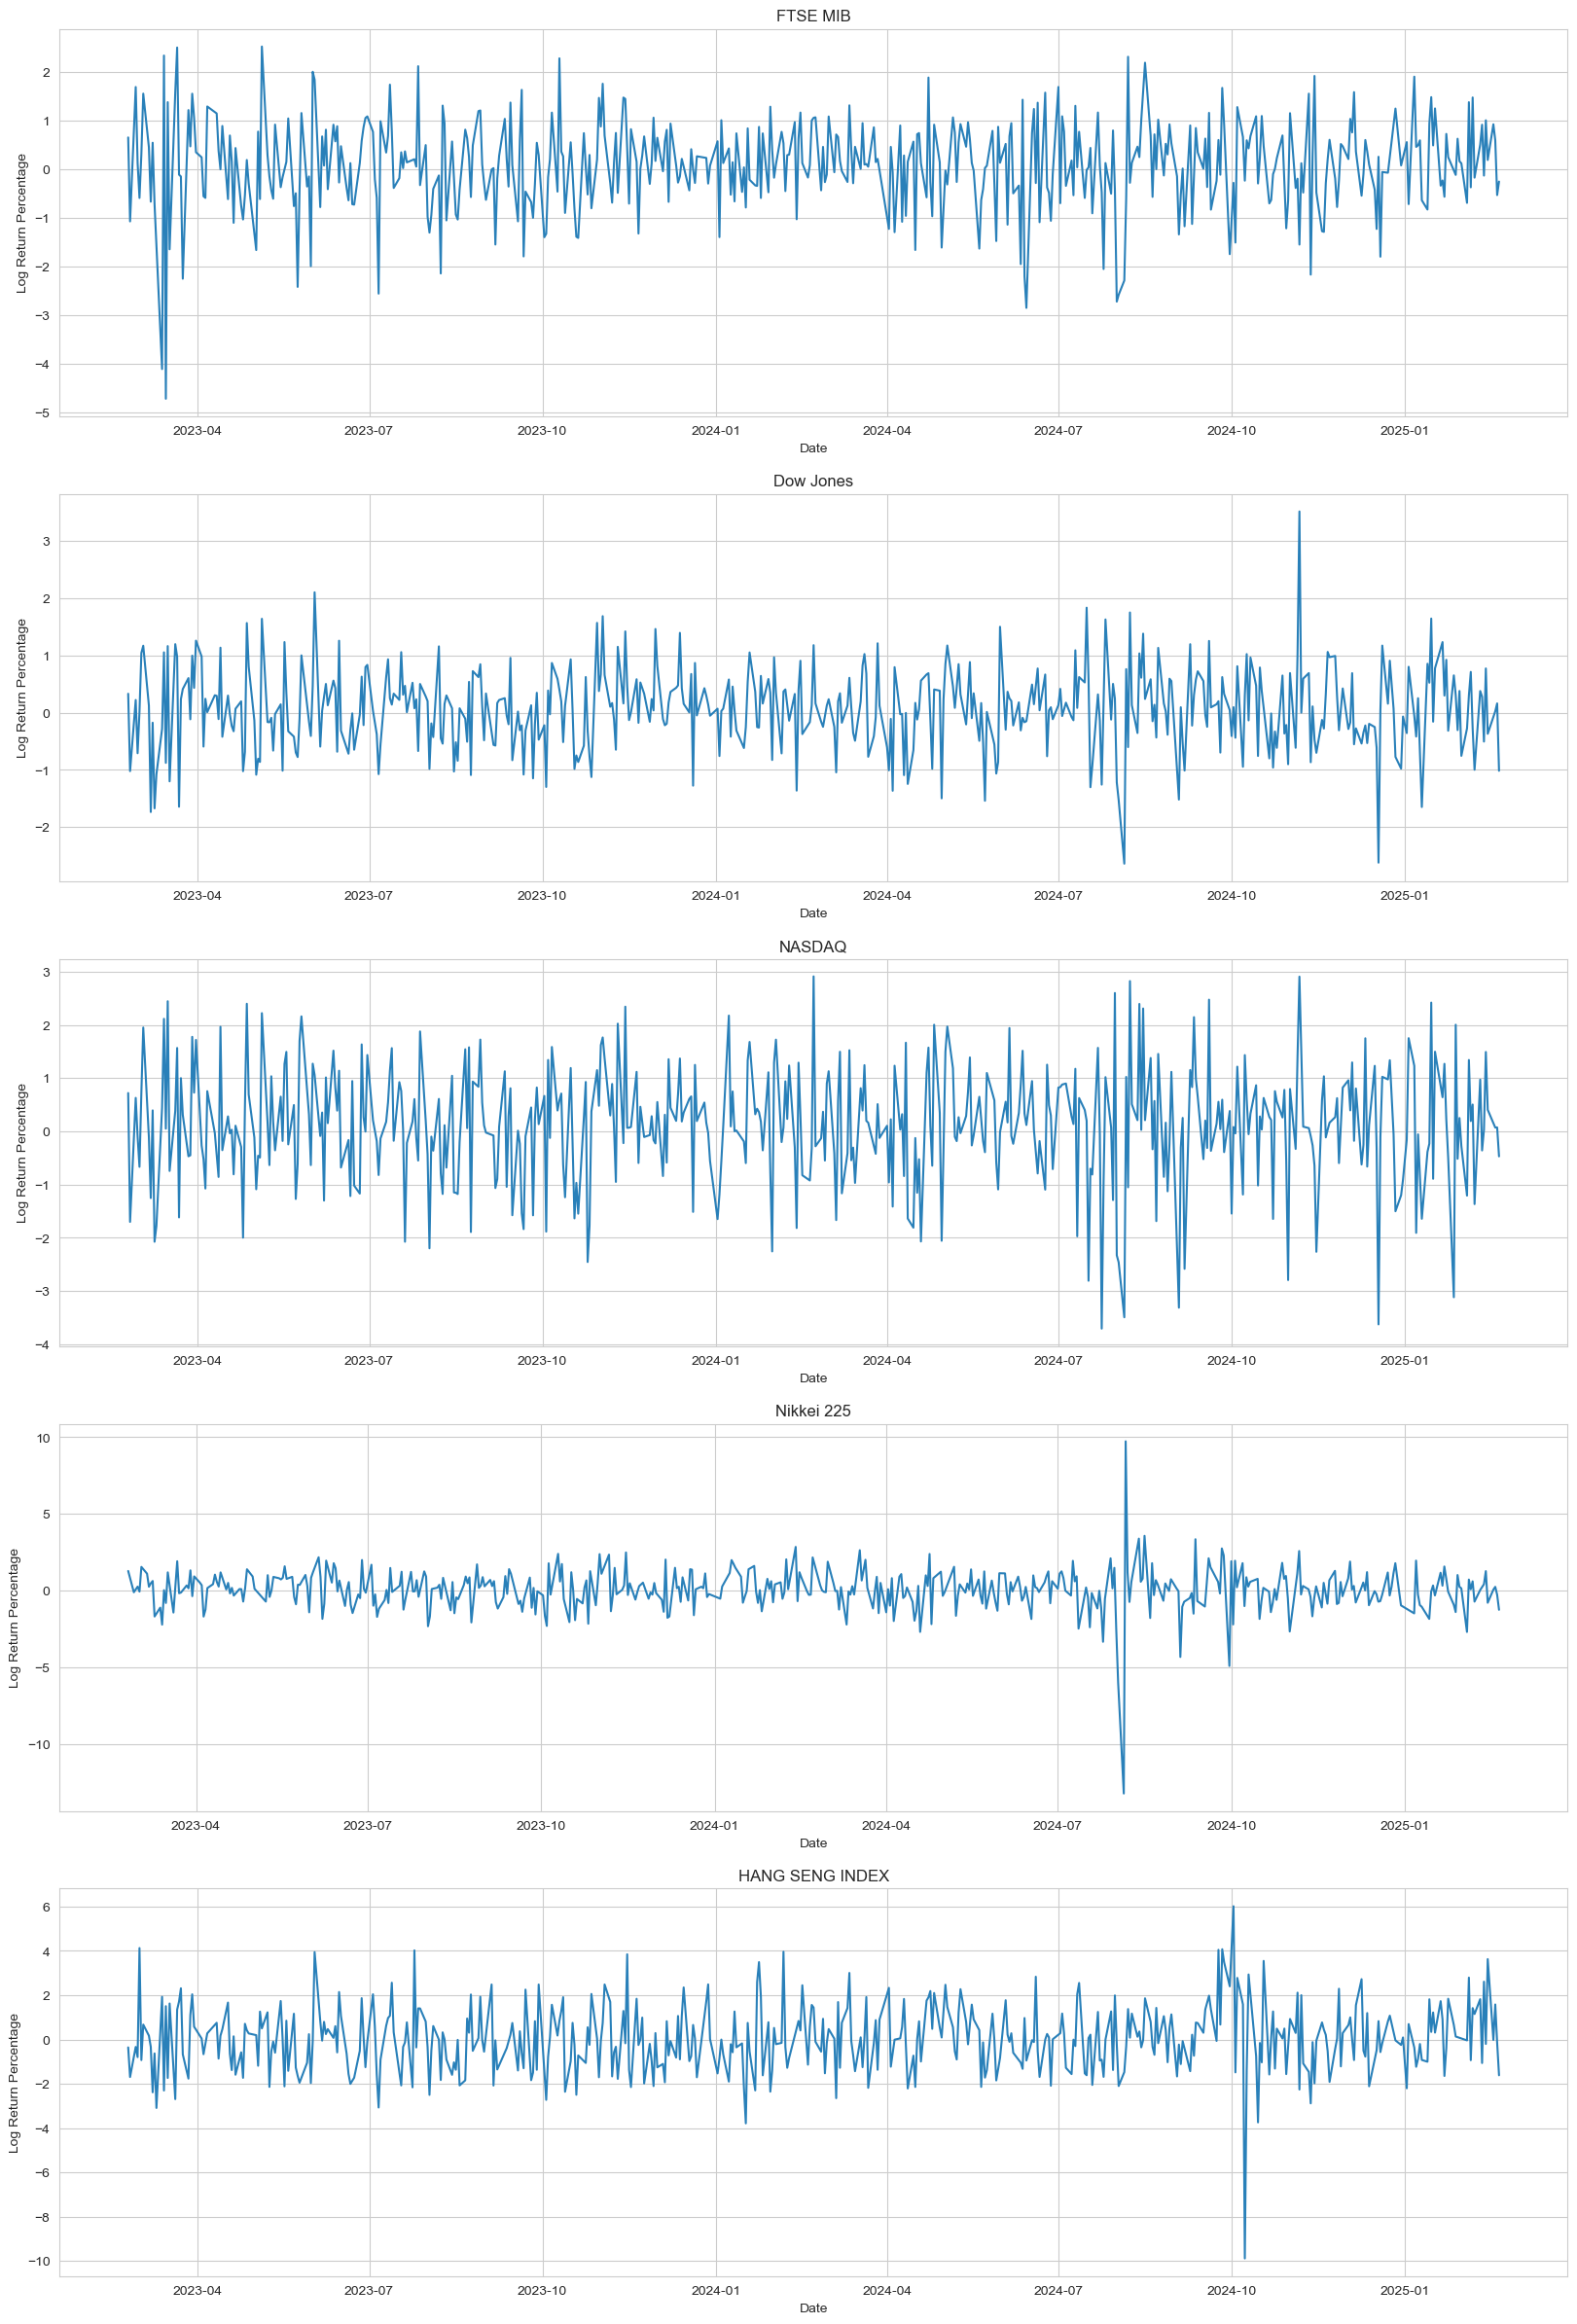

In [29]:
dfs_log_ret = []
for index in injector.indexes:
    dfs_log_ret.append(index.daily_info)
multi_plot_in_row(dfs=dfs_log_ret, plot_names=injector.get_indexes_names())

## Analisi del Dataset
Bisogna ora verificare se il dataset ha i requisiti per poter usare un modello GARCH.
### Test ADF
Verifica la presenza di una radice unitaria.
- Ipotesi nulla: serie temporale non è stazionaria (ha una radice unitaria).
### Test KPSS
Verifica la stazionarietà della serie temporale.
- Ipotesi nulla: serie temporale stazionaria.
### Test di Engle (ARCH Test)
Verifica la presenza di eteroschedasticità condizionata.
- Ipotesi nulla: la serie temporale non presenta eteroschedasticità condizionata (varianza costante nel tempo).

In [72]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
p_value = 0.05


def adfuller_test(indexes, target=im.ADJUSTED_CLOSE):
    res = {}
    for index in indexes: 
        df_target = index.get_df_by_name(target)
        adf_res = adfuller(df_target)
        res[index.i_name] = {
            'adf' : adf_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"accepted" if res[index.i_name]["adf"][1] < p_value else "rejected"}'
    return res

def kpss_test(indexes, target=im.ADJUSTED_CLOSE):
    res = {}
    for index in indexes: 
        df_target = index.get_df_by_name(target)
        kpss_res = kpss(df_target)
        res[index.i_name] = {
            'kpss' : kpss_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"accepted" if res[index.i_name]["kpss"][1] < p_value else "rejected"}'
    return res

def het_arch_test(indexes, target=im.LOG_RETURN_PERCENTAGE):
    res = {}

    for index in indexes: 
        df_target = (index.get_df_by_name(target).rolling(window=21).std() * np.sqrt(252)).dropna()
        het_arch_res = het_arch(df_target)
        res[index.i_name] = {
            'engles arch' : het_arch_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"accepted" if res[index.i_name]["engles arch"][1] < p_value else "rejected"}'
    return res

def print_res_test(data, test='adf') -> pd.DataFrame:
    ret = {}
    for index in data:
        ret[index] = {'pvalue' : data[index][test][1], 'outcome': data[index]['outcome']}
    return pd.DataFrame(ret)
        

In [8]:
adjusted_closes_adf = adfuller_test(indexes=injector.indexes, target=im.ADJUSTED_CLOSE)
log_ret_perc_adf = adfuller_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)

### Test ADF Chiusura Rettificata 

In [73]:
from IPython.display import display, Markdown
adjusted_closes_adf_table = print_res_test(adjusted_closes_adf).T.to_html(classes='styled-table', escape=False)
display(Markdown(adjusted_closes_adf_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.92705</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.887829</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.839797</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.270565</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.590663</td>
      <td>rejected</td>
    </tr>
  </tbody>
</table>

### Test ADF Ritorno logaritmico in percentuale

In [74]:
from IPython.display import display, Markdown
log_ret_perc_adf_table = print_res_test(log_ret_perc_adf).T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_adf_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
  </tbody>
</table>

### Interpretazione ADF
Questo è comune per serie storiche finanziarie in quanto, le chiusure rettificate tendono a non avere un comportamento stazionario mentre i ritorni si\
Quindi per il modelloGarch(1, 1) questo primo test indica che dovranno essere usati i ritorni logaritmici

In [22]:
%%capture
adjusted_closes_kpss = kpss_test(indexes=injector.indexes, target=im.ADJUSTED_CLOSE)
log_ret_perc_kpss = kpss_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)

In [75]:
from IPython.display import display, Markdown
adjusted_closes_kpss_table = print_res_test(adjusted_closes_kpss, test='kpss').T.to_html(classes='styled-table', escape=False)
display(Markdown(adjusted_closes_kpss_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.01</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.01</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.01</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.01</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.01</td>
      <td>accepted</td>
    </tr>
  </tbody>
</table>

In [76]:
from IPython.display import display, Markdown
log_ret_perc_kpss_table = print_res_test(log_ret_perc_kpss, test='kpss').T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_kpss_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.1</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.1</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.1</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.1</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.1</td>
      <td>rejected</td>
    </tr>
  </tbody>
</table>

### Interpretazione KPSS
Qui sia ha la conferma che KPSS ci dice che le chiusure rettificate non sono stazionarie mentre i ritorni logaritmici sìlog_ret_perc_kpss = kpss_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)

### Test Engle's Arch Ritorno sulla volatilià
Si decidere di prendere in considerazione i rendimenti logaritmici e si testa la volatilità realizzata su una finestra mobile di 21 giorni

In [55]:
log_ret_perc_het_arch = het_arch_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)

In [77]:
from IPython.display import display, Markdown
log_ret_perc_het_arch_table = print_res_test(log_ret_perc_het_arch, test='engles arch').T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_het_arch_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.0</td>
      <td>accepted</td>
    </tr>
  </tbody>
</table>

### Interpretazione Engle's Arch
La volatilià non è costante quindi si può procedere l'utilizzo di un modello GARCH

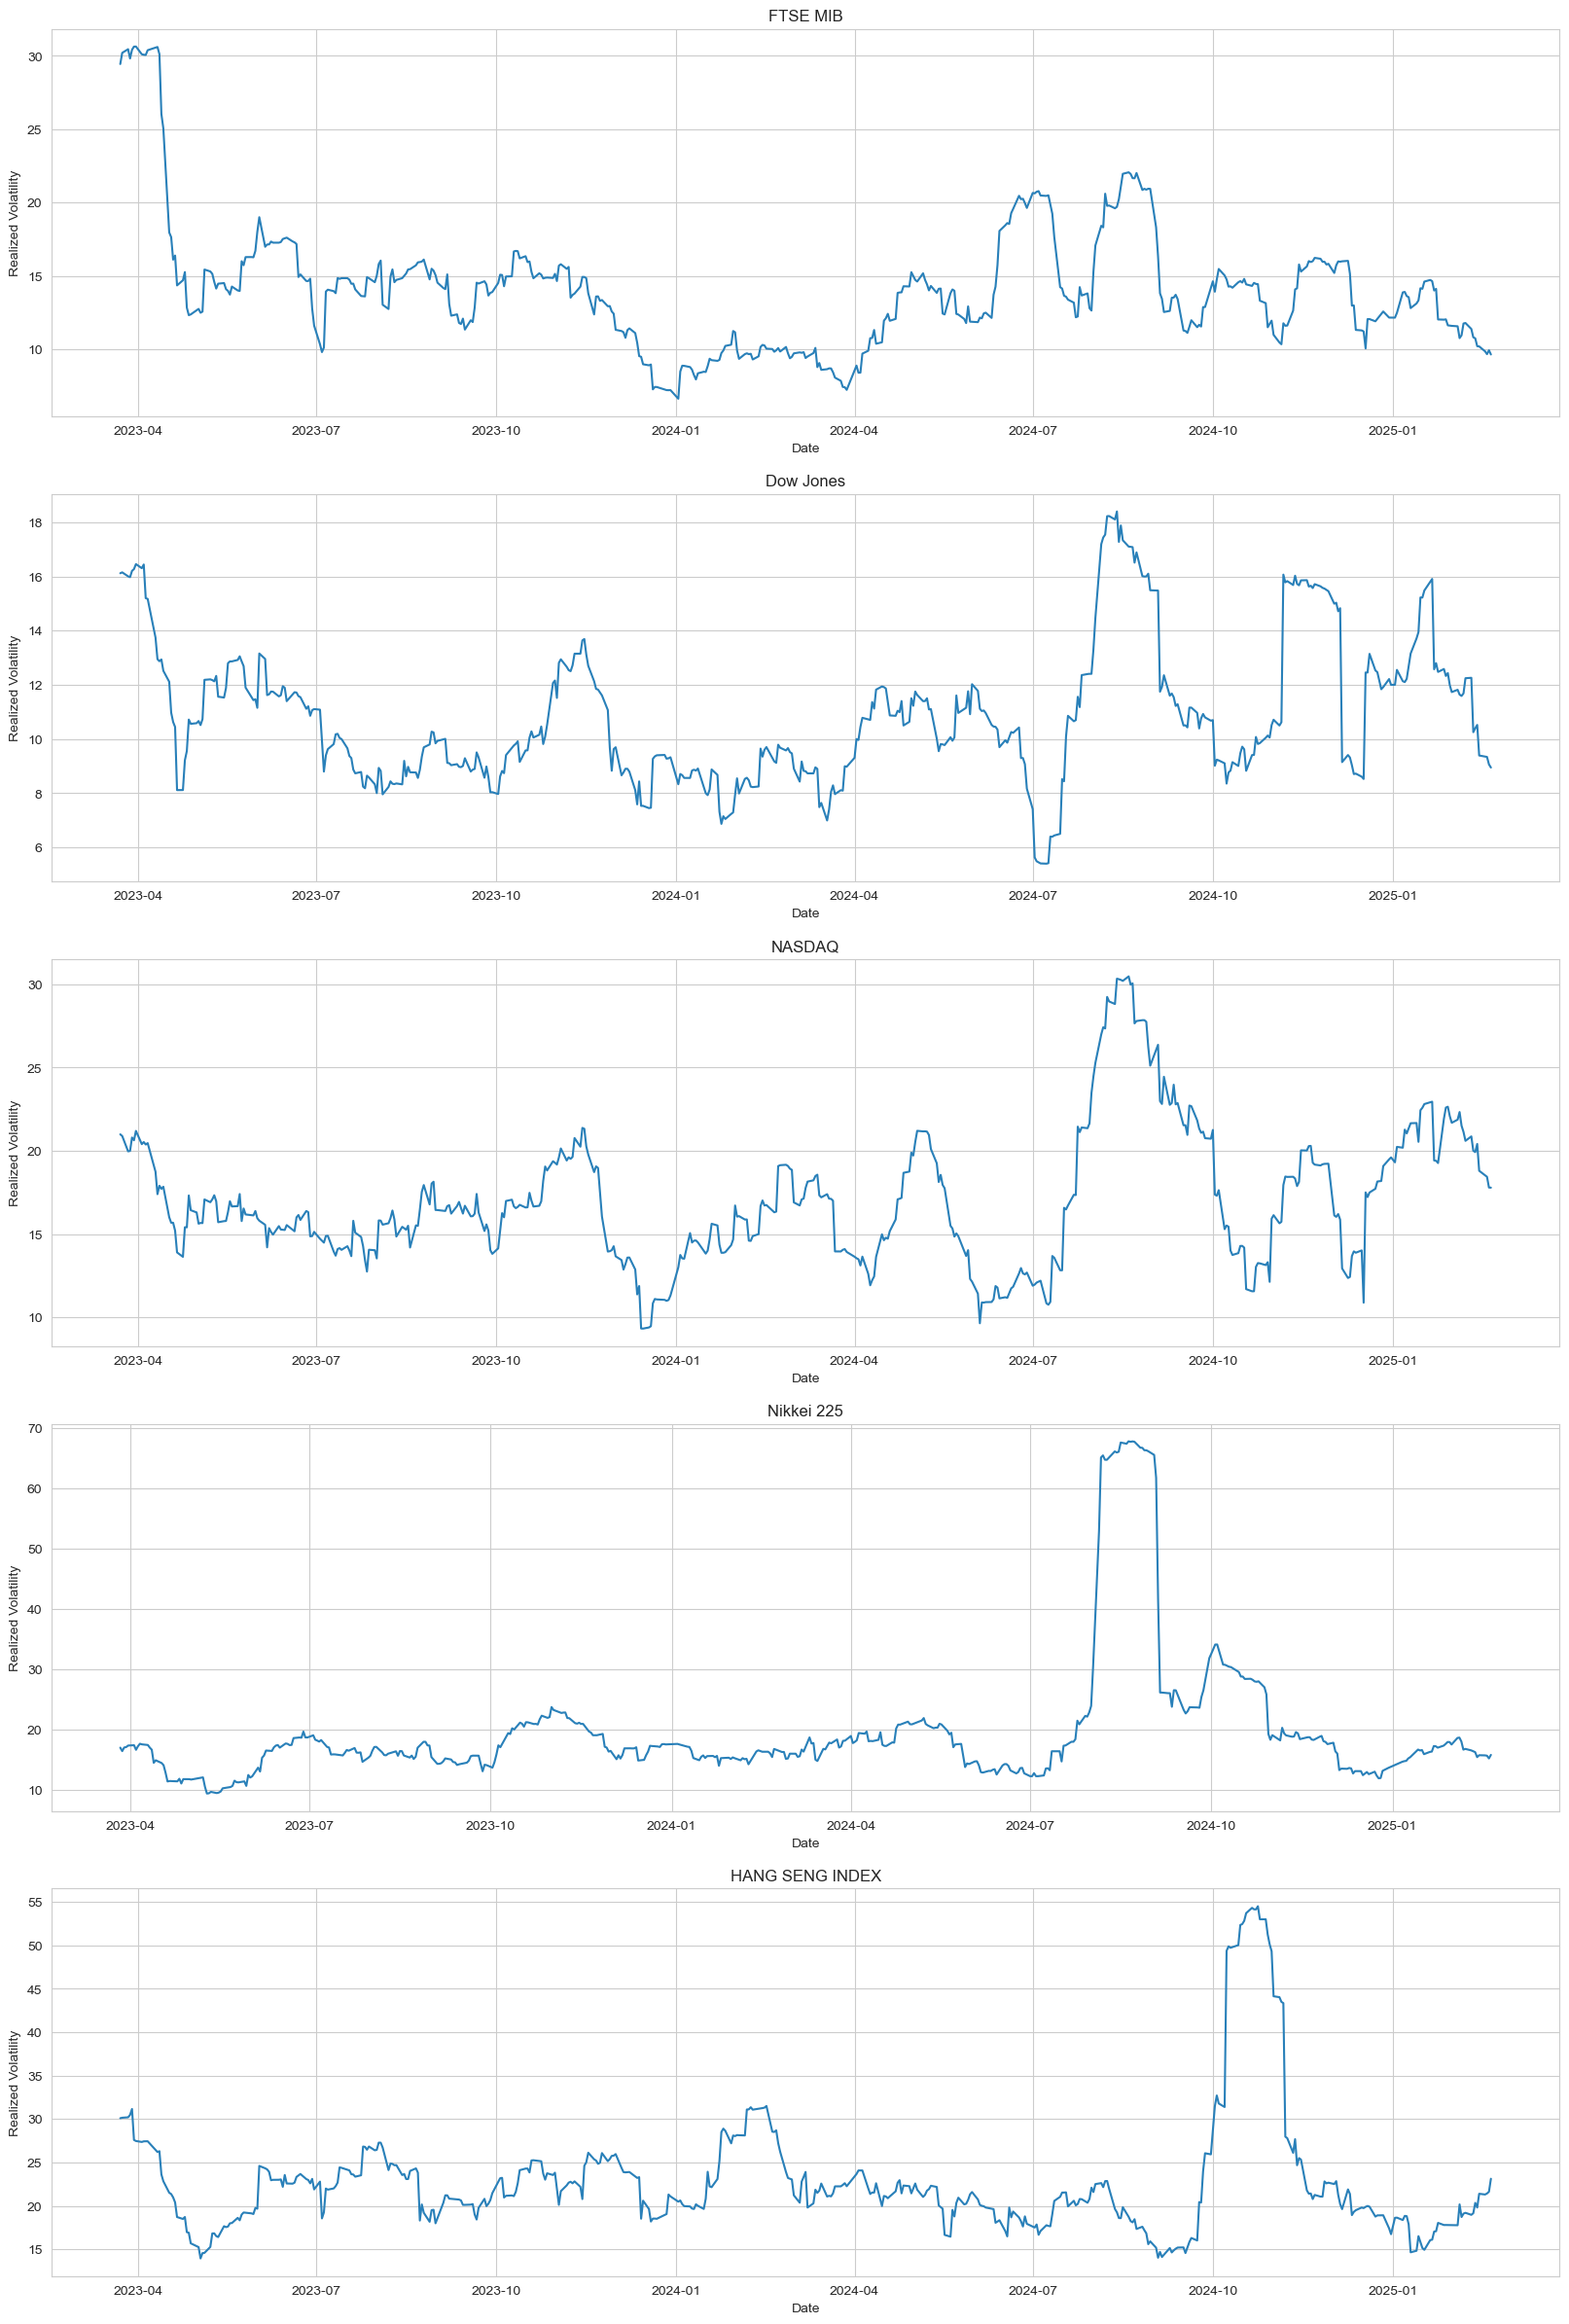

In [57]:
volatilities = []
for index in injector.indexes: 
    df = pd.DataFrame((index.get_df_by_name(im.LOG_RETURN_PERCENTAGE).rolling(window=21).std() * np.sqrt(252)).dropna())
    df.columns = ['Realized Volatility']
    volatilities.append(df)
volatilities
multi_plot_in_row(dfs=volatilities, plot_names=injector.get_indexes_names(), info="Realized Volatility")

## Controllo della Normalità
In questo paragrafo si controlla se i rendimenti logaritmici seguono un andamento Gaussiano

In [113]:

from scipy.stats import shapiro, normaltest, jarque_bera

def shapiro_test(indexes, target=im.LOG_RETURN_PERCENTAGE):
    res = {}
    for index in indexes: 
        df_target = index.get_df_by_name(target)
        shapiro_res = shapiro(df_target)
        res[index.i_name] = {
            'shapiro' : shapiro_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"rejected" if res[index.i_name]["shapiro"].pvalue < p_value else "accepted"}'
    return res


def agostino_person_test(indexes, target=im.LOG_RETURN_PERCENTAGE):
    res = {}
    for index in indexes: 
        df_target = index.get_df_by_name(target)
        normaltest_res = normaltest(df_target)
        res[index.i_name] = {
            'agostino-person' : normaltest_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"rejected" if res[index.i_name]["agostino-person"].pvalue < p_value else "accepted"}'
    return res

def jarque_bera_test (indexes, target=im.LOG_RETURN_PERCENTAGE):
    res = {}
    for index in indexes: 
        df_target = index.get_df_by_name(target)
        jarque_bera_res = jarque_bera(df_target)
        res[index.i_name] = {
            'jarque-bera' : jarque_bera_res,
            'parameter': target
        }
        res[index.i_name]['outcome'] = f'{"rejected" if res[index.i_name]["jarque-bera"].pvalue < p_value else "accepted"}'
    return res


In [114]:
log_ret_perc_shapiro = shapiro_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)

In [115]:
from IPython.display import display, Markdown
log_ret_perc_shapiro_table = print_res_test(log_ret_perc_shapiro, test='shapiro').T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_shapiro_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.000406</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.000214</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
  </tbody>
</table>

In [116]:
log_ret_perc_agostino_pearson = agostino_person_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)  

In [117]:
from IPython.display import display, Markdown
log_ret_perc_agostino_pearson_table = print_res_test(log_ret_perc_agostino_pearson, test='agostino-person').T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_agostino_pearson_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.000118</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.000232</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
  </tbody>
</table>

In [118]:
log_ret_perc_jarque_bera = jarque_bera_test(indexes=injector.indexes, target=im.LOG_RETURN_PERCENTAGE)  

In [119]:
from IPython.display import display, Markdown
log_ret_perc_jarque_bera_table = print_res_test(log_ret_perc_jarque_bera, test='jarque-bera').T.to_html(classes='styled-table', escape=False)
display(Markdown(log_ret_perc_jarque_bera_table))

<table border="1" class="dataframe styled-table">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pvalue</th>
      <th>outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FTSE MIB</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Dow Jones</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>NASDAQ</th>
      <td>0.000061</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>Nikkei 225</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
    <tr>
      <th>HANG SENG INDEX</th>
      <td>0.0</td>
      <td>rejected</td>
    </tr>
  </tbody>
</table>

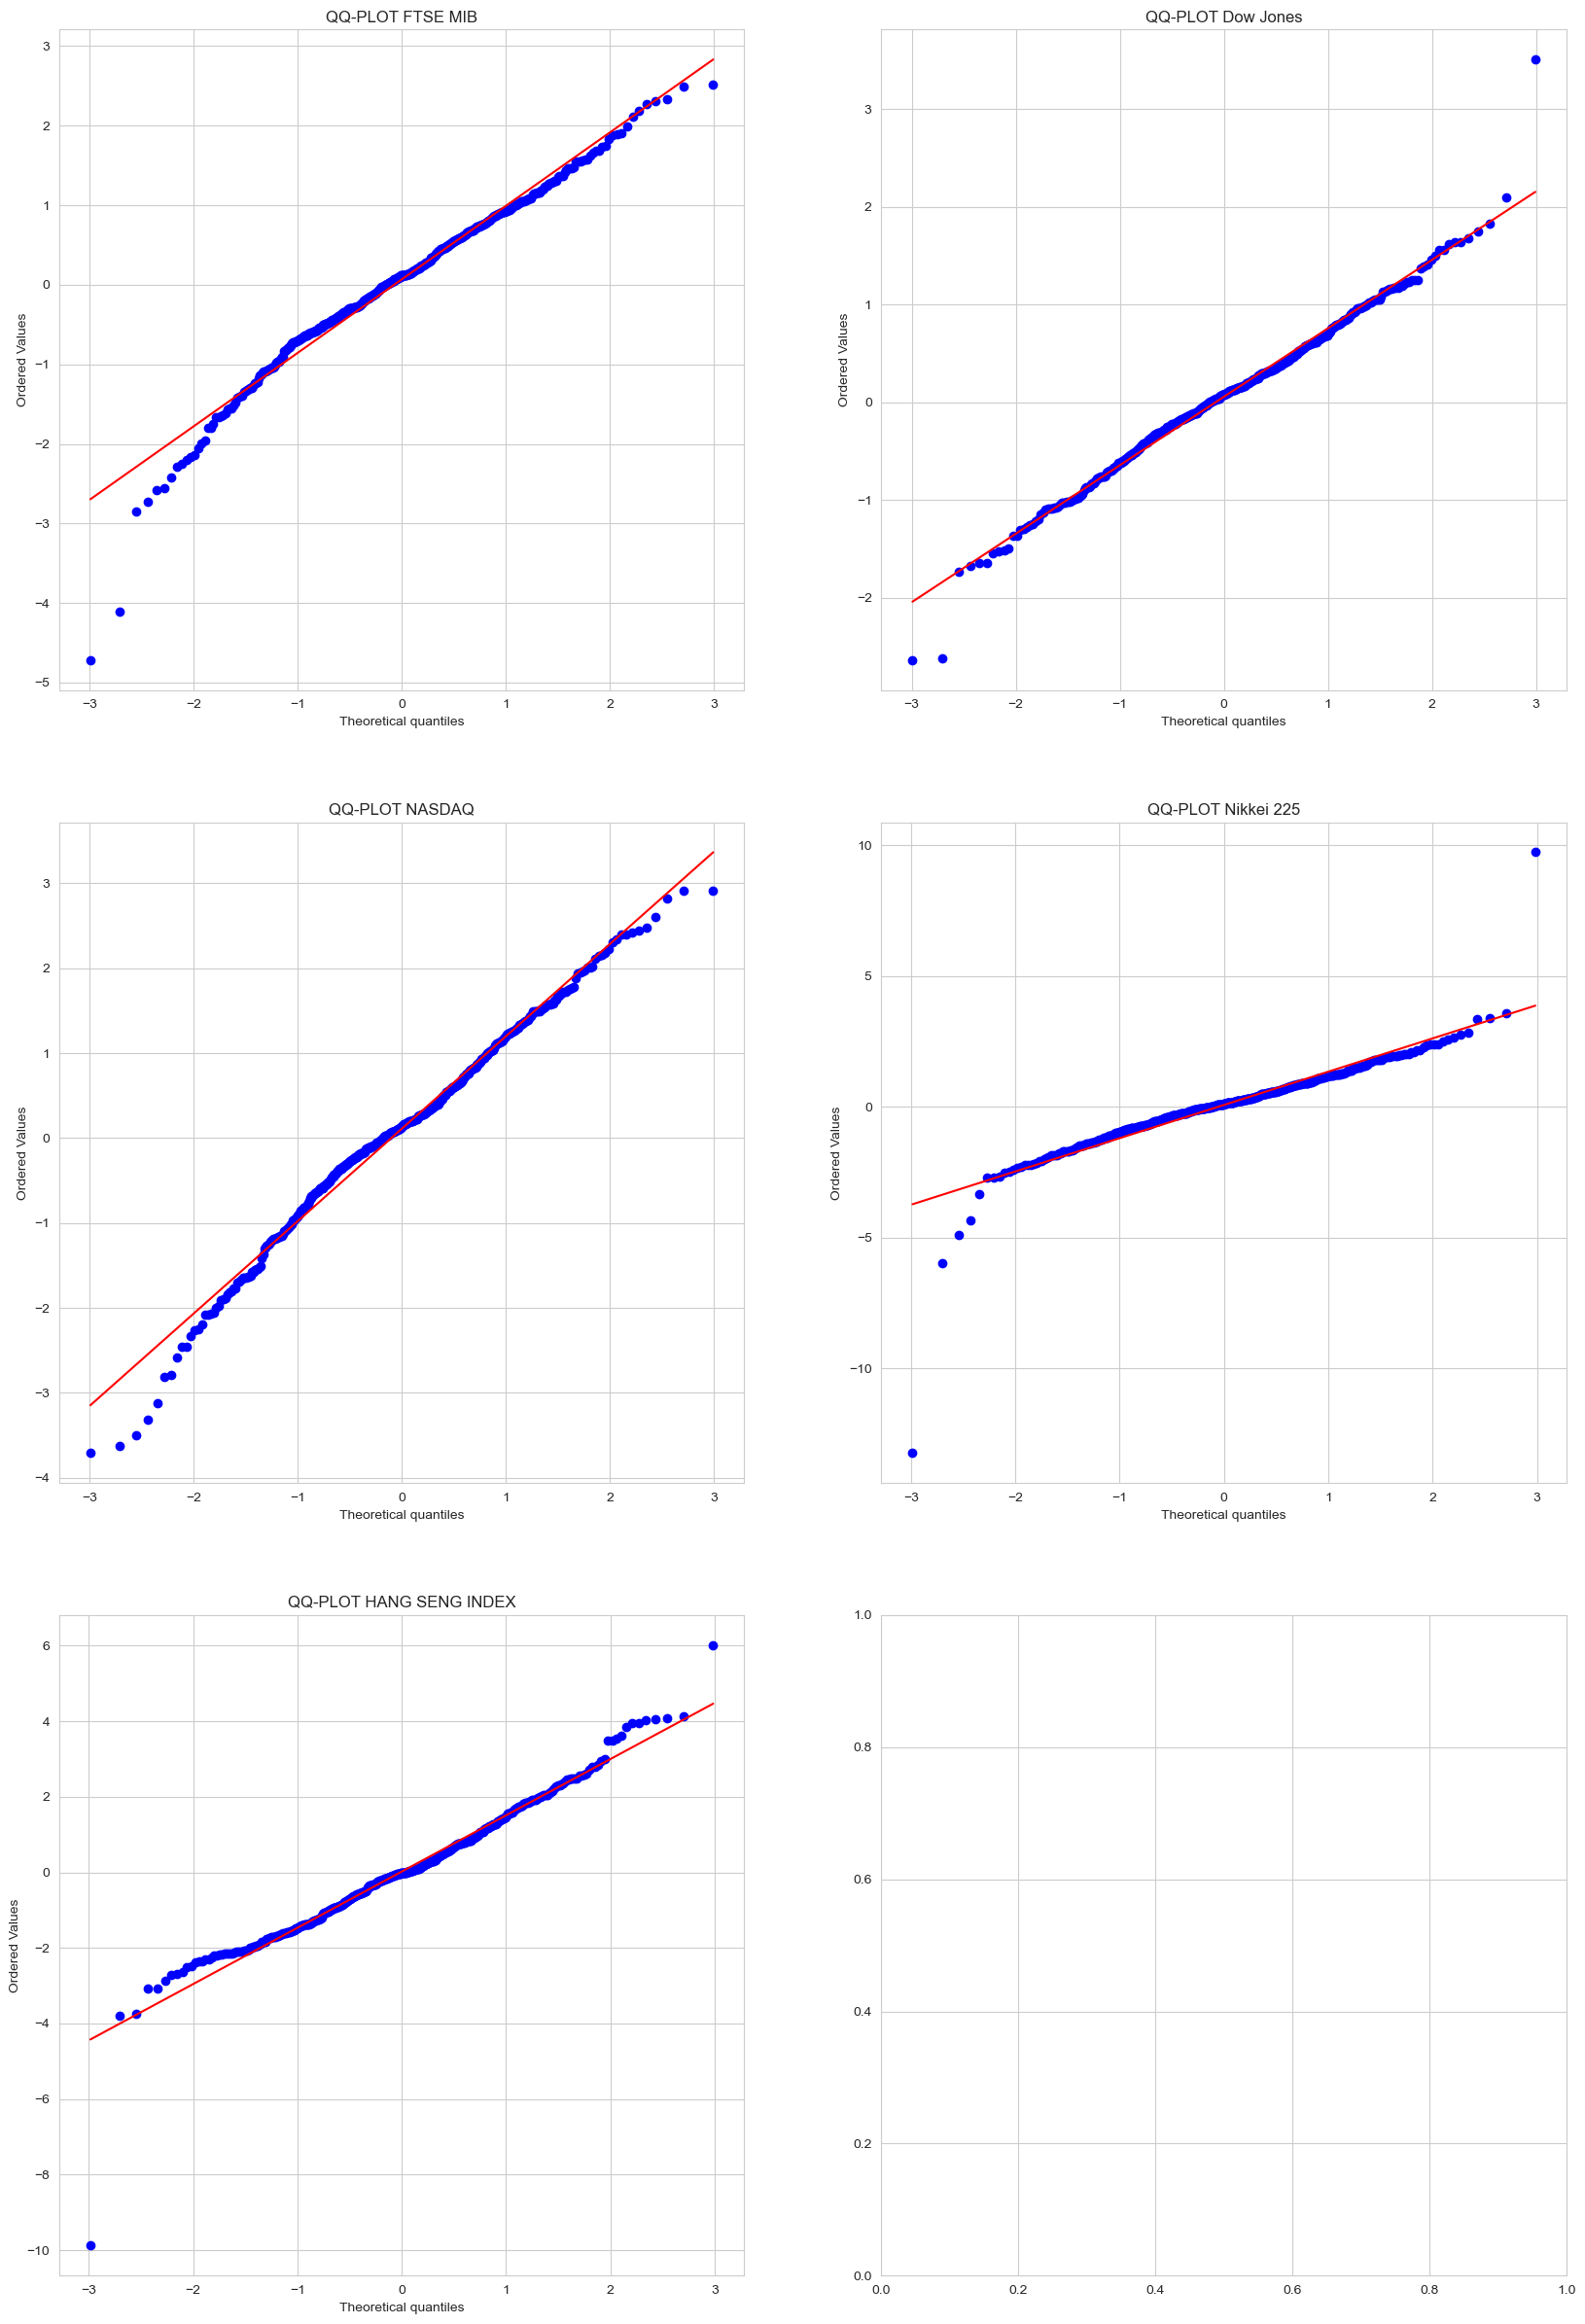

In [112]:
import scipy.stats as stats
fig, axs = plt.subplots(len(injector.indexes) - 2, 2, figsize=(20,30))
i = 0
j = 0
for index in injector.indexes:
    stats.probplot(index.daily_info[im.LOG_RETURN_PERCENTAGE], dist="norm", plot=axs[i][j])
    axs[i][j].set_title(f'QQ-PLOT {index.i_name}')
    j += 1
    if j % 2 == 0:
        j = 0
        i+=1
    
plt.show()

## Modelli GARCH
I modelli GARCH (Generalized Autoregressive Conditional Heteroskedasticity) sono una famiglia di modelli utilizzati per analizzare e prevedere la volatilità nel contesto delle serie temporali finanziarie, come i prezzi delle azioni, i tassi di cambio o i tassi di interesse. Questi modelli sono particolarmente utili quando la variabilità dei dati non è costante nel tempo, cioè quando la volatilità cambia periodicamente
### Motivazione per l'uso dei modelli GARCH
In molte serie temporali finanziarie, la variabilità dei rendimenti non è uniforme nel tempo. Ad esempio, durante periodi di crisi economica, la volatilità tende ad aumentare, mentre durante periodi di stabilità, la volatilità può ridursi.
I modelli GARCH sono progettati per catturare questa variabilità dinamica, facendo sì che la volatilità futura dipenda sia dai valori passati della volatilità che dagli errori di previsione passati.
### Struttura del modello GARCH
Un modello GARCH è costituito da due componenti principali:

- Autoregressivo (AR): Modella la dipendenza della serie temporale dai suoi valori passati.
- Condizionale (CH): Specifica come la volatilità condizionale (varianza) dipenda dai dati passati.
Un modello GARCH(p, q) può essere espresso come segue:

$${r_t=\mu + \epsilon_t}$$
$${\epsilon_t=\sigma_te_t}$$
$${\sigma^2_t=\omega+\alpha\epsilon^2_{t-1}+\beta\sigma^2_{t-1}}$$
dove:
- ${r_t}$ è il rendimento al tempo t
- ${\mu}$ è la media della serie
- ${\epsilon}$ è l'errore al tempo t che dipende dalla volatilità condizionale ${\sigma^2_t}$\
La volatilità condizionale ${\sigma^2_t}$ è modellata come una combinazione lineare degli errori passati e dalla volatilità al passo precedente

## Scelta del modello GARCH



In [13]:
def multi_stem_in_row(dfs: list[pd.DataFrame], info=IndexMeta.ACF_LOG_RET,
                      fig_size=(20, 30), plot_names=None):
    if plot_names is None:
        plot_names = ["plot"]
    fig, axs = plt.subplots(len(dfs), 1, figsize=fig_size)
    i = 0
    for df in dfs:
        axs[i].stem(df.index, df[info], linefmt='b-', markerfmt='bo', basefmt='r-')
        axs[i].set_title(f'{plot_names[i%len(plot_names)]}')
        i+=1
    plt.show()

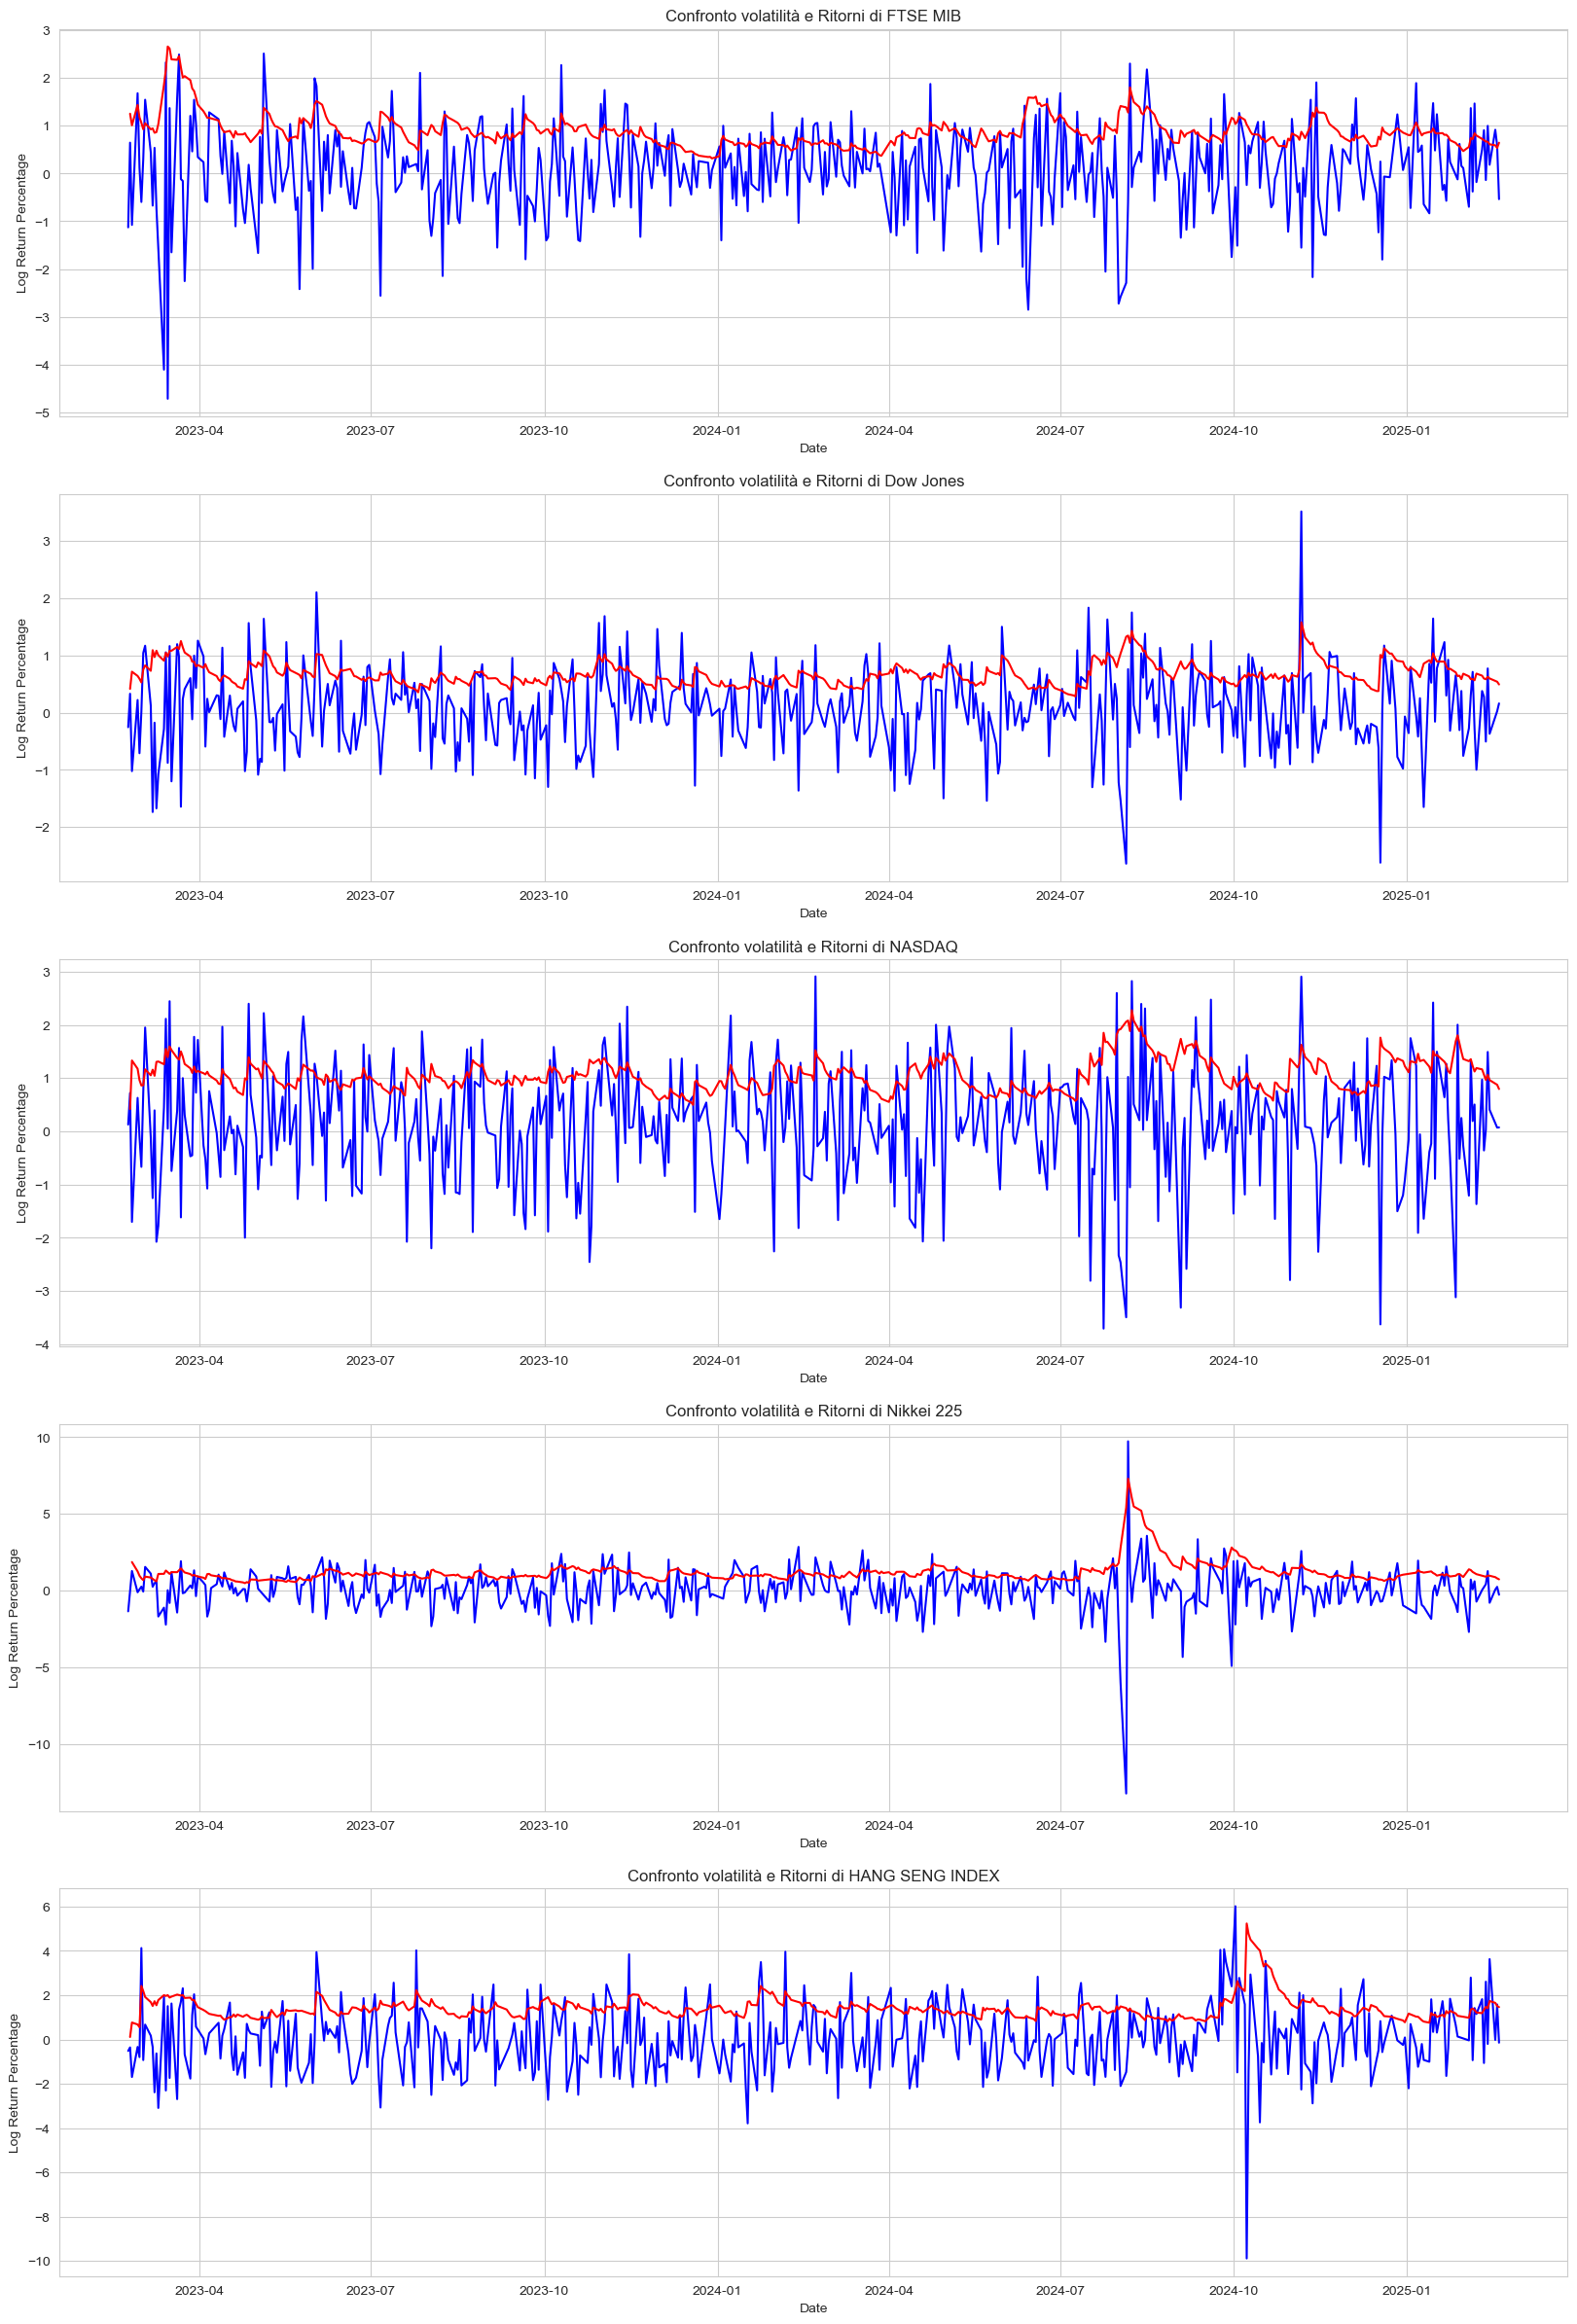

In [14]:
fig, axs = plt.subplots(len(injector.indexes), 1, figsize=(20, 30))
i = 0
for index in injector.indexes:
    sns.lineplot(x=index.daily_info.index, y=index.daily_info[IndexMeta.LOG_RETURN_PERCENTAGE], ax=axs[i], color='blue')
    sns.lineplot(x=index.volatility.index, y=index.volatility[IndexMeta.VOLATILITY_EWM], ax=axs[i], color='red')
    axs[i].set_title(f'Confronto volatilità e Ritorni di {index.i_name}')
    i+=1
plt.show()

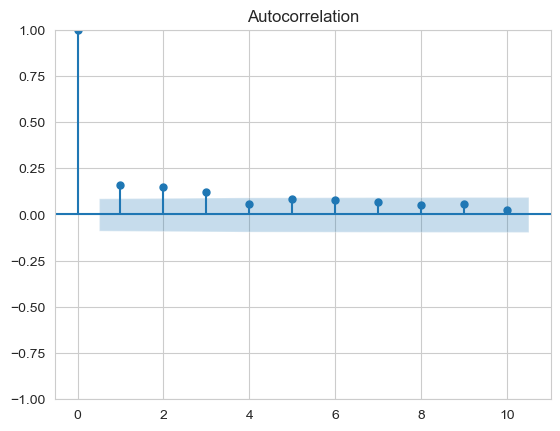

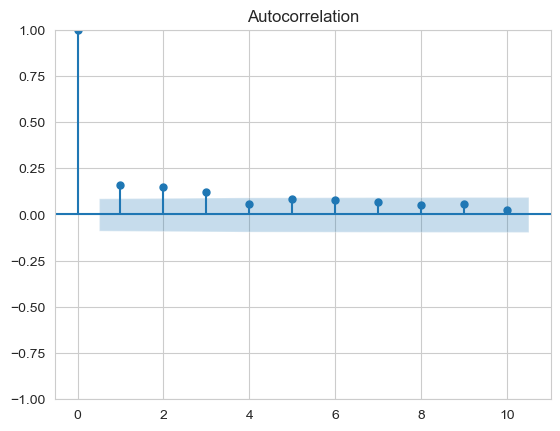

In [16]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
df = injector.indexes[0].daily_info
df.dropna()
acf_val = acf(df[im.LOG_RETURN_PERCENTAGE][2:], nlags=20)
plot_acf(df[im.ABSOLUTE_RETURN][2:], lags=10)

In [6]:
from statsmodels.tsa.stattools import adfuller
from IPython.display import display, HTML
datasets = {}

for index in injector.indexes:
    datasets[index.i_name] = {'Returns': pd.DataFrame(index.daily_info[im.LOG_RETURN_PERCENTAGE])}
    size = int(0.9 * len(datasets[index.i_name]['Returns']))
    train, test = datasets[index.i_name]['Returns'][:size], datasets[index.i_name]['Returns'][size:]
    datasets[index.i_name]['Training'] = train
    datasets[index.i_name]['Test'] = test

res_for_diplay = []

for index in datasets:
    adf_test = adfuller(datasets[index]['Returns'], maxlag=20, autolag='aic')
    res_for_diplay.append({
        "Indice": index,
        "ADF Statistic": adf_test[0],
        "p-value": adf_test[1],
        "Lags Used": adf_test[2],
        "Observations Used": adf_test[3],
        "1% Critical Value": adf_test[4]['1%'],
        "5% Critical Value": adf_test[4]['5%'],
        "10% Critical Value": adf_test[4]['10%']
    })

# Creiamo un DataFrame
df_for_display = pd.DataFrame(res_for_diplay)

# Convertiamo la tabella in HTML e la visualizziamo
display(HTML(df_for_display.to_html(index=False)))

Indice,ADF Statistic,p-value,Lags Used,Observations Used,1% Critical Value,5% Critical Value,10% Critical Value
FTSE MIB,-23.095985,0.0,0,504,-3.443392,-2.867292,-2.569833
Dow Jones,-20.876104,0.0,0,499,-3.443523,-2.867350,-2.569864
NASDAQ,-22.314235,0.0,0,499,-3.443523,-2.867350,-2.569864
Nikkei 225,-23.277235,0.0,0,487,-3.443849,-2.867493,-2.569941
HANG SENG INDEX,-21.622682,0.0,0,487,-3.443849,-2.867493,-2.569941


Ci si aspetta un comportamento stazionario, dei ritorni logarimitici nel breve periodo, in questo caso questa verifica serve per i modelli garch

In [11]:
from arch import arch_model
from arch.univariate import HARX
def get_best_garch(train=None) -> (HARX | None, tuple[int, int, str], float) :
    ps = (1, 8)
    qs = (1, 8)
    dists = ['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged']
    vols =['GARCH' , 'ARCH' , 'EGARCH' , 'FIGARCH' , 'APARCH' , 'HARCH']
    best_model = None
    best_params = None
    best_aic = np.inf  # Impostiamo AIC iniziale a infinito

    for p in ps:
        for q in qs:
            for dist in dists:
                #dist = 'ged'
                vol = 'GARCH'
                try:
                    real_p = p
                    real_q = q
                    if vol == 'FIGARCH':
                        real_p = p % 2
                        real_q = q % 2
                    garch_model = arch_model(train, vol=vol,p=real_p, q=real_q, dist=dist)
                    garch_fit = garch_model.fit(disp="off")  # Disabilita output verboso

                    # Prendi il valore di AIC
                    aic = garch_fit.aic  

                    # Se è il migliore finora, aggiorna i parametri
                    if aic < best_aic:
                        best_aic = aic
                        best_model = garch_fit
                        best_params = (real_p, real_q, dist, vol)

                except Exception as e:
                    print(f"Errore con p={real_p}, q={real_q}, dist={dist}, vol={vol}: {e}")
        return (best_model, best_params, best_aic)
for index in datasets:     
    model, params, aic = get_best_garch(datasets[index]['Training']) 
    datasets[index]['Garch(1,1)'] = {
        "model" : model,
        "params" : params,
        "aic" : aic,
        "conditional_volatility": pd.DataFrame(model.conditional_volatility)
    }
    print(f'Analyzed model GARCH for {index}')
    print(f"params {params}")

Analyzed model GARCH for FTSE MIB
params (1, 1, 'skewstudent', 'GARCH')
Analyzed model GARCH for Dow Jones
params (1, 1, 'ged', 'GARCH')
Analyzed model GARCH for NASDAQ
params (1, 1, 'ged', 'GARCH')
Analyzed model GARCH for Nikkei 225
params (1, 1, 'skewstudent', 'GARCH')
Analyzed model GARCH for HANG SENG INDEX
params (1, 1, 'skewstudent', 'GARCH')


## Volatilità stimata
Si può osservare la volatilità stimata di dei modelli garch


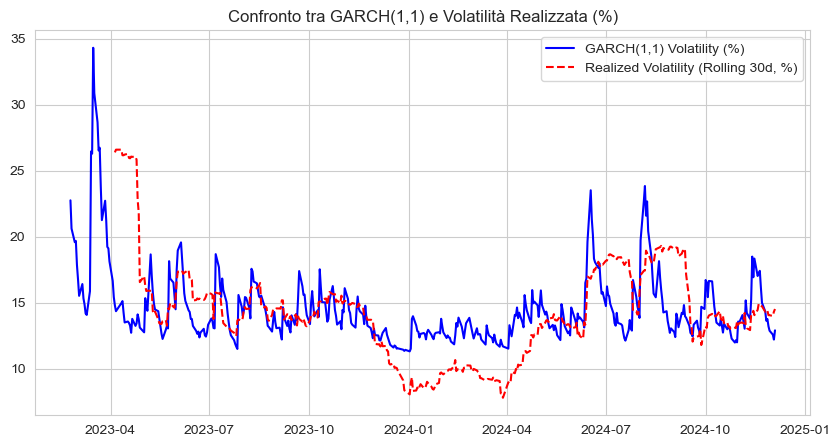

In [29]:
df = pd.DataFrame(datasets['FTSE MIB']['Training']['Log Return Percentage'])
results = datasets['FTSE MIB']['Garch(1,1)']['model']
df["garch_volatility"] = results.conditional_volatility * np.sqrt(252)
df['realized_volatility'] = df["Log Return Percentage"].rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["garch_volatility"], label="GARCH(1,1) Volatility (%)", color="blue")
plt.plot(df.index, df["realized_volatility"], label="Realized Volatility (Rolling 30d, %)", color="red", linestyle="dashed")
plt.title("Confronto tra GARCH(1,1) e Volatilità Realizzata (%)")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
df["realized_volatility"].fillna(method="bfill", inplace=True)
mse = mean_squared_error(df["realized_volatility"].dropna(), df["garch_volatility"].dropna())
print(f"Mean Squared Error: {mse:.6f}")

Mean Squared Error: 14.373621


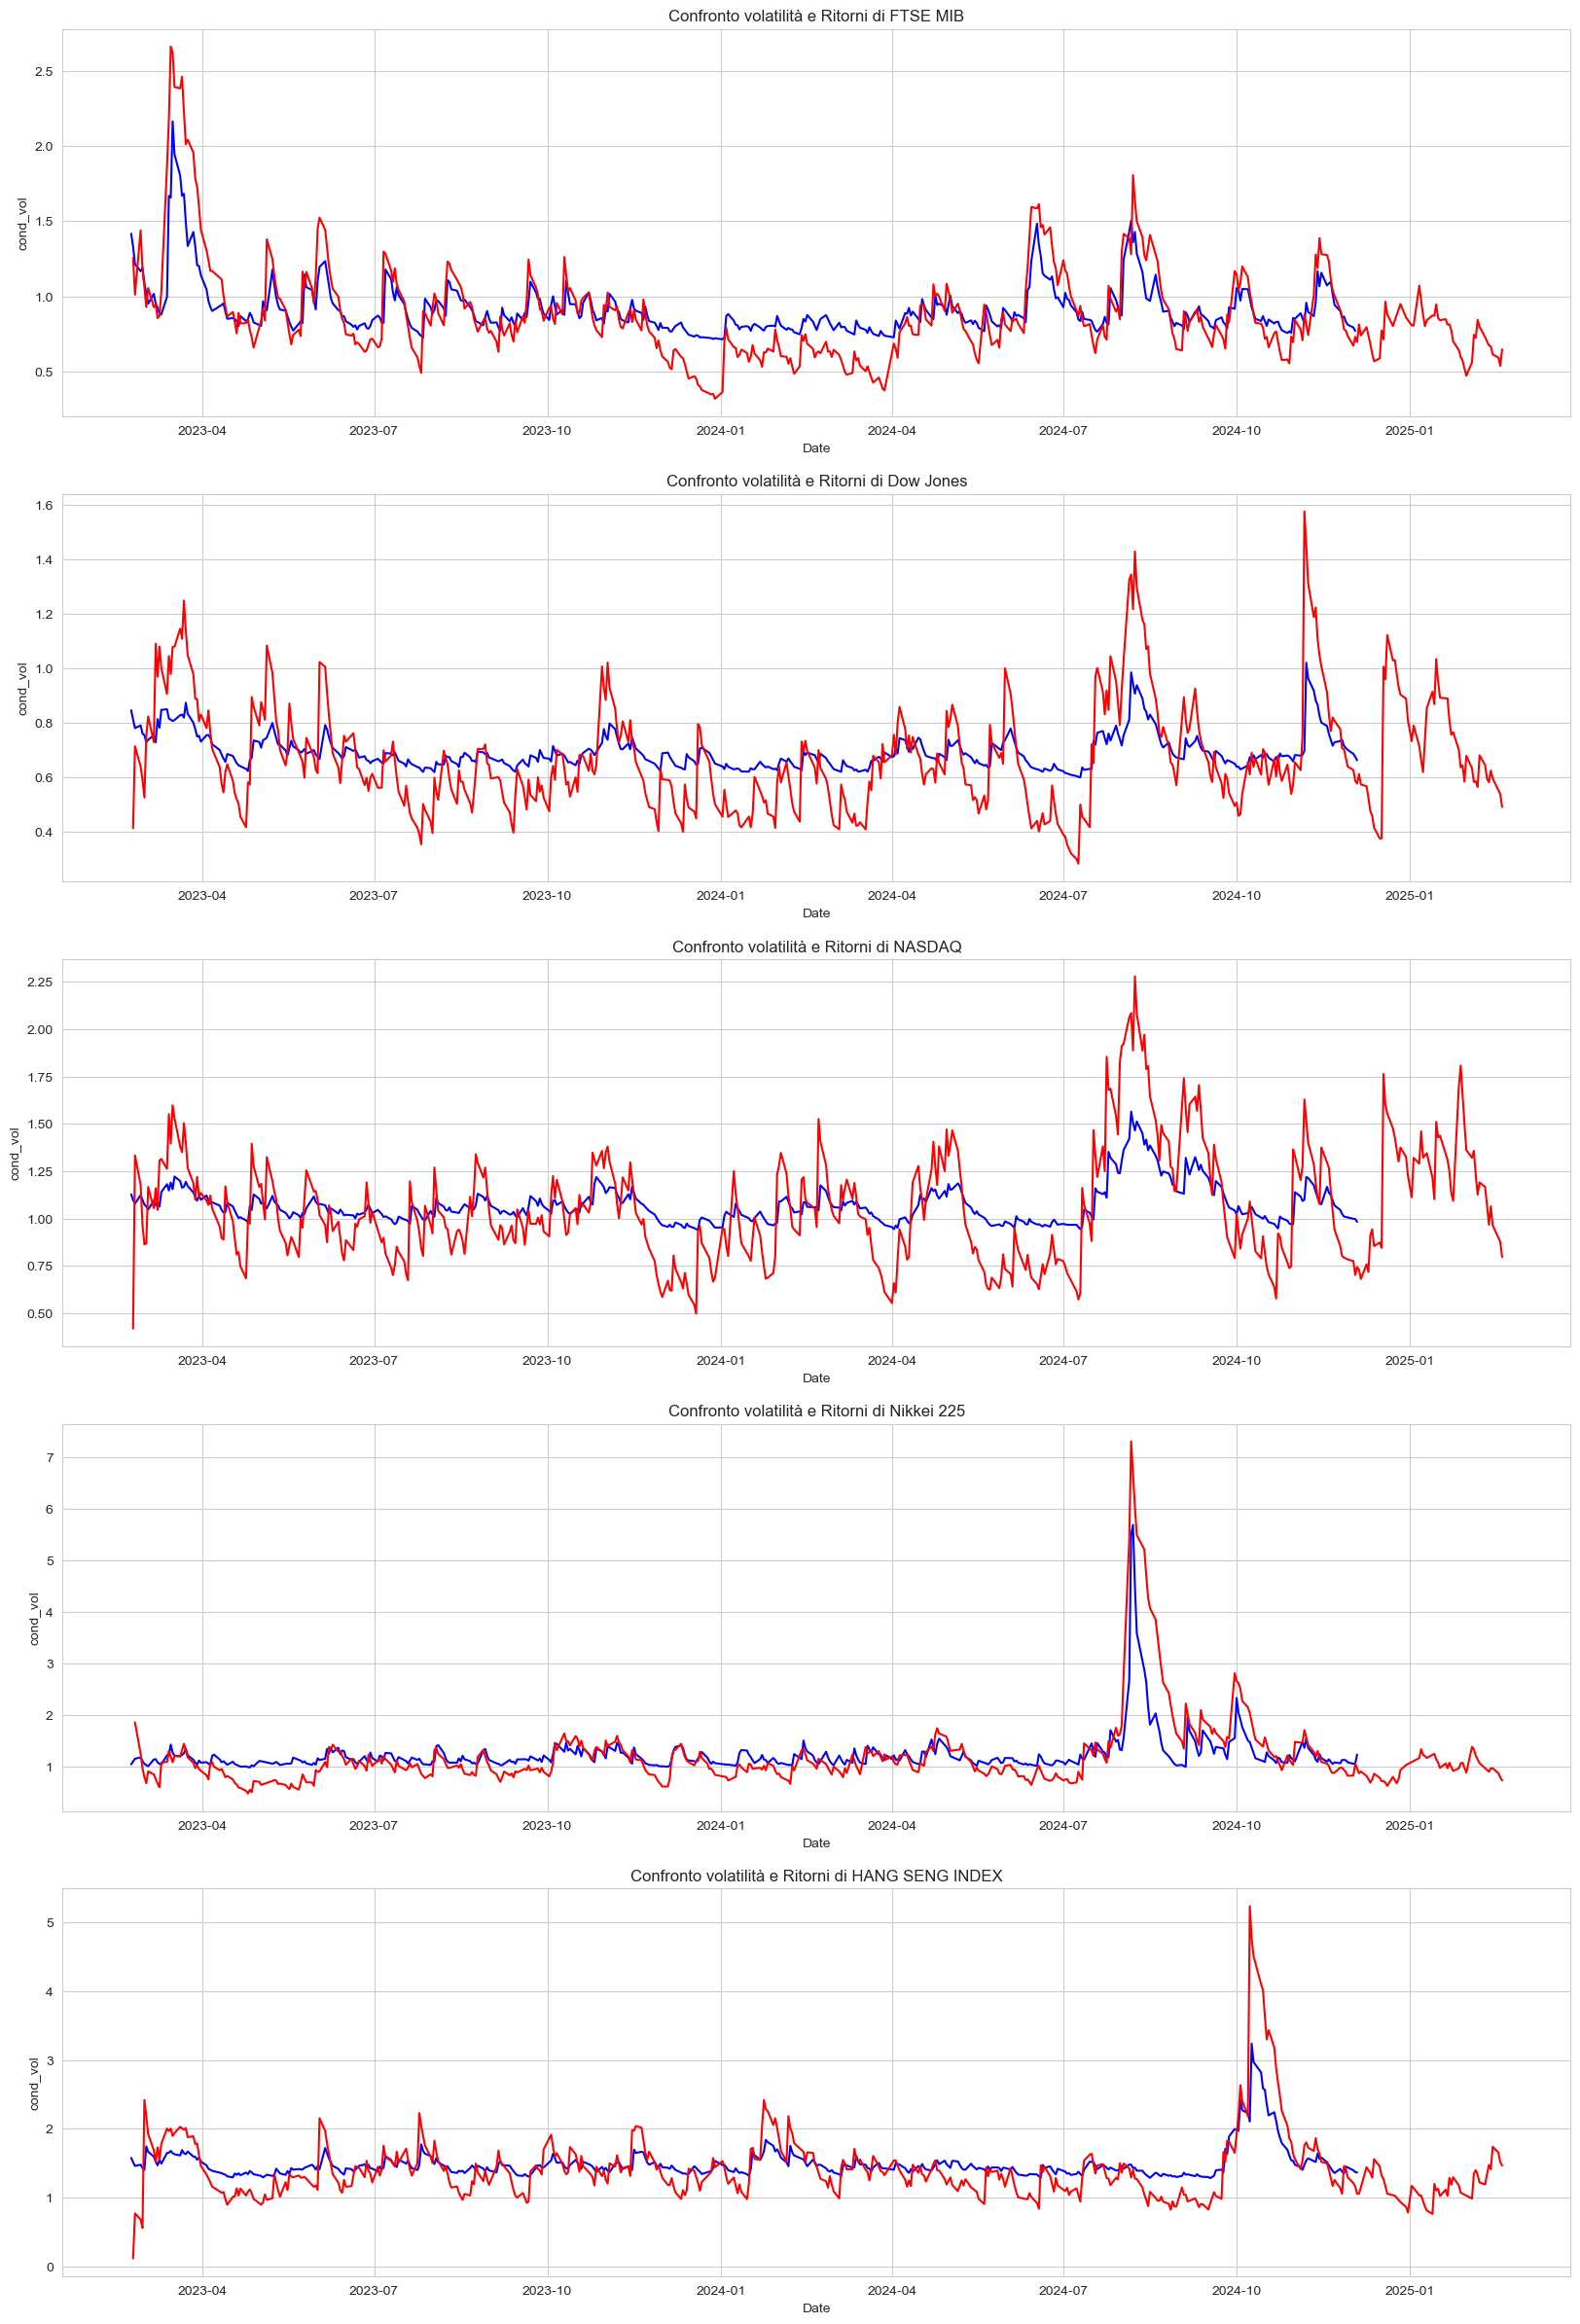

In [37]:
fig, axs = plt.subplots(len(injector.indexes), 1, figsize=(20, 30))
i = 0
for index in injector.indexes:
    sns.lineplot(x=datasets[index.i_name]['Garch(1,1)']['conditional_volatility'].index, y=datasets[index.i_name]['Garch(1,1)']['conditional_volatility']['cond_vol'], ax=axs[i], color='blue')
    sns.lineplot(x=index.volatility.index, y=index.volatility[IndexMeta.VOLATILITY_EWM], ax=axs[i], color='red')
    axs[i].set_title(f'Confronto volatilità e Ritorni di {index.i_name}')
    i+=1
plt.show()

## Verifica dei Residui
### Ljung-Box
Si vuole verificare che i residui standardizzati abbiano un comportamento white noise

In [100]:
injector.indexes[0].volatility[1:]

,Volatility Ewm,Annualized Volatility Ewm
Date,,
2023-02-23,1.254188,19.909611
2023-02-24,1.010337,16.038600
2023-02-27,1.437942,22.826614
2023-02-28,1.178194,18.703248
2023-03-01,1.063849,16.888074
...,...,...
2025-02-13,0.666316,10.577444
2025-02-14,0.612489,9.722964
2025-02-17,0.592039,9.398329


In [94]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
validations = {}
for index in datasets:
    
    res_std = datasets[index]['Garch(1,1)']['model'].resid / datasets[index]['Garch(1,1)']['model'].conditional_volatility
    lb = acorr_ljungbox(res_std, lags=[10], return_df=True)
    at = het_arch(res_std)
    jb = jarque_bera(res_std)
    lb_sq = acorr_ljungbox(res_std**2, lags=[10], return_df=True)

    dw_stat = durbin_watson(res_std)
    dw_message = 'Buono'
    if dw_stat < 1.5:
        dw_message = 'Auto Correlazione Positiva'
    elif dw_stat > 2.5:
        dw_message = 'Auto Correlazione Negativa'
        
    validations[index] = {
    'ljung-box': {'satistic': lb['lb_stat'].values[0], 'pvalue': lb['lb_pvalue'].values[0], 'accepted': (lb['lb_pvalue'].values[0] > 0.05)},
    'ljung-box-squared': {'satistic': lb_sq['lb_stat'].values[0], 'pvalue': lb_sq['lb_pvalue'].values[0], 'accepted': (lb_sq['lb_pvalue'].values[0] > 0.05)},
    'arch_test': {'satistic': at[0], 'pvalue': at[1], 'accepted': (at[1] > 0.05)},
    'jarque-bera': {'satistic': jb[0], 'pvalue': jb[1], 'accepted': (jb[1] > 0.05)},
    'durbin-watson' : {'value' : dw_stat, 'interpretation': dw_message}
    
    }
validations

{'FTSE MIB': {'ljung-box': {'satistic': 5.8089173316020055,
   'pvalue': 0.8310534767756941,
   'accepted': True},
  'ljung-box-squared': {'satistic': 4.021534427299269,
   'pvalue': 0.9463702968306412,
   'accepted': True},
  'arch_test': {'satistic': 4.2486227129599285,
   'pvalue': 0.9354349339679856,
   'accepted': True},
  'jarque-bera': {'satistic': 28.398104333580125,
   'pvalue': 6.814437233856885e-07,
   'accepted': False},
  'durbin-watson': {'value': 1.9980088767904012, 'interpretation': 'Buono'}},
 'Dow Jones': {'ljung-box': {'satistic': 4.877021950605079,
   'pvalue': 0.8992401127891523,
   'accepted': True},
  'ljung-box-squared': {'satistic': 6.47284981024284,
   'pvalue': 0.7740964331935747,
   'accepted': True},
  'arch_test': {'satistic': 6.583427753035349,
   'pvalue': 0.7640992069774835,
   'accepted': True},
  'jarque-bera': {'satistic': 26.690234109477217,
   'pvalue': 1.6006239199850697e-06,
   'accepted': False},
  'durbin-watson': {'value': 1.8685998714846153, 

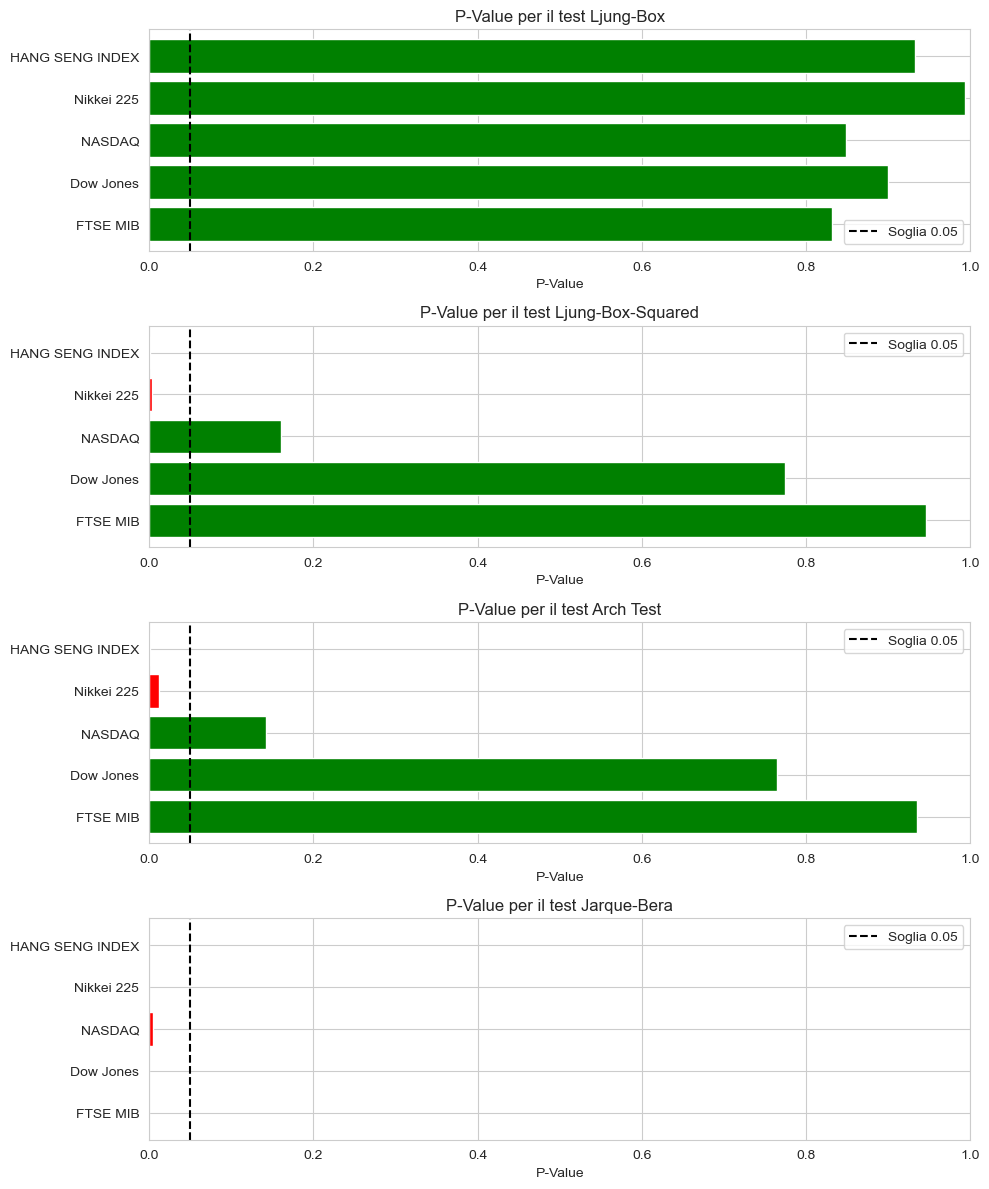

In [97]:
def plot_test_results(results):
    """
    Grafica i risultati dei test statistici per più indici di borsa.
    
    Parametri:
    results (dict): Dizionario con i risultati dei test per ogni indice.
    """
    tests = ["ljung-box", "ljung-box-squared", "arch_test", "jarque-bera"]
    
    fig, axes = plt.subplots(len(tests), 1, figsize=(10, 12))
    
    for i, test in enumerate(tests):
        indices = []
        pvalues = []
        accepted = []
        
        for index, test_results in results.items():
            if test in test_results:
                indices.append(index)
                pvalues.append(test_results[test]['pvalue'])
                accepted.append(test_results[test]['accepted'])
        
        # Colori basati sull'esito del test (verde = accettato, rosso = rifiutato)
        colors = ['green' if acc else 'red' for acc in accepted]
        
        # Creazione del grafico
        ax = axes[i]
        ax.barh(indices, pvalues, color=colors)
        ax.axvline(x=0.05, color='black', linestyle='dashed', label="Soglia 0.05")
        ax.set_xlim(0, 1)
        ax.set_xlabel("P-Value")
        ax.set_title(f"P-Value per il test {test.replace('_', ' ').title()}")
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
plot_test_results(validations)  

In [ ]:
### Una volta analizzato il modello GARCH(1,1) facendo le varie verifiche controllare come posso usare RM GARCH in R

In [ ]:
%%capture
from controller.garch_model import Analyzer
analyzer = Analyzer(loader=injector)
analyzer.fit()

In [ ]:
fig = analyzer.actual_results[0].plot(annualize='D')

In [ ]:
from arch import arch_model

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
am = arch_model(injector.indexes[0].daily_return['Log Return Percentage'], p=1, o=1, q=1, dist='skewt')
res = am.fit(update_freq=5, disp='off')
res.plot(annualize='D')

In [ ]:
f_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
f_res.plot(annualize='D')

In [ ]:
df = pd.DataFrame(res.conditional_volatility)
df

In [ ]:
injector.indexes[0].volatility

In [ ]:
con = pd.concat([df, injector.indexes[0].volatility], axis=1, join='outer').dropna()
subplot = con.plot()
subplot.set_xlim(xlim)

In [ ]:
dummy = pd.DataFrame(injector.indexes[0].daily_return['Log Return Percentage'])
dummy_ewma = np.sqrt(dummy.ewm(span=1/(1-0.90)).var())
dummy_ewma.dropna()

In [ ]:
con = pd.concat([df, dummy_ewma], axis=1, join='outer').dropna()
subplot = con.plot()
subplot.set_xlim(xlim)

In [ ]:
%%capture
!jupyter nbconvert --to html --no-input project.ipynb


In [ ]:
import pandas as pd
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

date_range = pd.date_range(start="2023-01-01", end=pd.Timestamp.today(), freq="D")

np.random.seed(42)
df = pd.DataFrame({
    "Prezzo": np.random.randn(len(date_range)) * 10 + 100,
    "ADJUSTED_CLOSE": np.random.randn(len(date_range)) * 5 + 50,
}, index=date_range)

df_log_ret = np.log(df / df.shift(1)) * 100
df_log_ret = injector.get_multi_index()

if df_log_ret.shape[1] == 1:
    df_log_ret['log_ret_2'] = df_log_ret.iloc[:, 0]


pandas2ri.activate()
r_rets = ro.conversion.py2rpy(df_log_ret)
r_rets = ro.r('as.matrix')(r_rets) 

r_dccgarch_code = """
                library('rmgarch')
                function(r_rets, n_days){
                        r_rets <- as.matrix(r_rets)
                        n <- dim(r_rets)[2]

                        if (n < 2) stop("Errore: DCC-GARCH richiede almeno due serie temporali.")  

                        univariate_spec <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                                                    variance.model = list(garchOrder = c(1,1),
                                                                        variance.targeting = FALSE, 
                                                                        model = "sGARCH"),
                                                    distribution.model = "norm")
                        
                        dcc_spec <- dccspec(uspec = multispec(replicate(n, univariate_spec)),
                                            dccOrder = c(1,1),
                                            distribution = "mvlaplace")
                        
                        dcc_fit <- dccfit(dcc_spec, data=r_rets)
                        forecasts <- dccforecast(dcc_fit, n.ahead = n_days)
                        list(dcc_fit, forecasts@mforecast$H)
                }
                """

r_dccgarch = ro.r(r_dccgarch_code)
r_res = r_dccgarch(r_rets, 20) 
pandas2ri.deactivate()

r_dccgarch_model = r_res[0]
r_forecast_cov = r_res[1]

n_cols = df_log_ret.shape[1]
n_elements = n_cols * n_cols
n_matrix = len(r_forecast_cov[0]) // n_elements

cov_matrix = np.zeros((n_cols, n_cols))
for i in range(n_matrix):
    i_matrix = np.array(r_forecast_cov[0][i * n_elements:(i + 1) * n_elements])
    i_matrix = i_matrix.reshape(n_cols, n_cols)
    cov_matrix += i_matrix

print("Numero di matrici previste:", n_matrix)
print("Matrice di covarianza sommata:\n", cov_matrix)


R[write to console]: Caricamento del pacchetto richiesto: rugarch

R[write to console]: Caricamento del pacchetto richiesto: parallel

R[write to console]: 
Caricamento pacchetto: 'rugarch'


Exception ignored from cffi callback <function _consolewrite_ex at 0x0000022B02397920>:
Traceback (most recent call last):
  File "F:\programmi\anaconda\Lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\programmi\anaconda\Lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 20: invalid continuation byte


Numero di matrici previste: 20
Matrice di covarianza sommata:
 [[16.18112644  4.53580938  5.23575162  4.84467151  6.16231843]
 [ 4.53580938  9.7782883   9.80868467  2.57365762  2.47742506]
 [ 5.23575162  9.80868467 22.90735674  4.13861092  5.17494735]
 [ 4.84467151  2.57365762  4.13861092 25.88868308  7.93301505]
 [ 6.16231843  2.47742506  5.17494735  7.93301505 51.01486288]]


In [112]:
corr_matrix = np.corrcoef(cov_matrix)
print("Matrice di correlazione:\n", corr_matrix)

Matrice di correlazione:
 [[ 1.         -0.27504774 -0.32079996 -0.26338815 -0.10060656]
 [-0.27504774  1.          0.79372293 -0.63343534 -0.5716112 ]
 [-0.32079996  0.79372293  1.         -0.44478105 -0.3247416 ]
 [-0.26338815 -0.63343534 -0.44478105  1.          0.0131546 ]
 [-0.10060656 -0.5716112  -0.3247416   0.0131546   1.        ]]


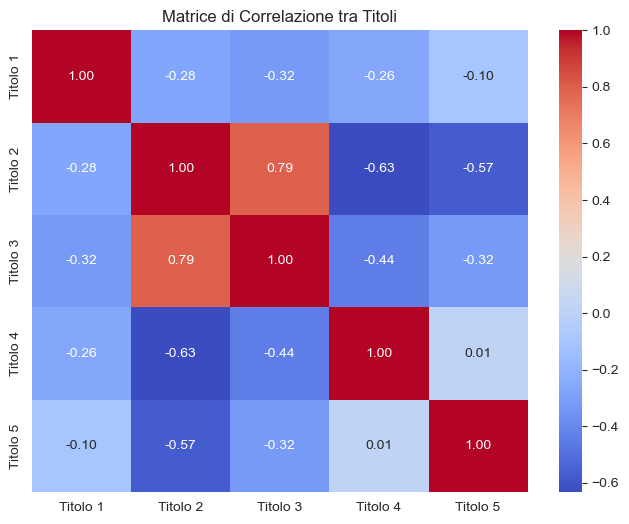

In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, 
            xticklabels=["Titolo 1", "Titolo 2", "Titolo 3", "Titolo 4", "Titolo 5"],
            yticklabels=["Titolo 1", "Titolo 2", "Titolo 3", "Titolo 4", "Titolo 5"])

plt.title("Matrice di Correlazione tra Titoli")
plt.show()

In [98]:
i_matrix

array([[1.53913976, 0.42765988],
       [0.29743373, 0.11712531]])

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt


np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=1000, freq="D")
returns = pd.DataFrame(data=np.random.normal(0, 0.5, len(dates)), index=dates, columns=["returns"])

print(returns.head())

             returns
2020-01-01  0.248357
2020-01-02 -0.069132
2020-01-03  0.323844
2020-01-04  0.761515
2020-01-05 -0.117077


(10, 10)
                h.01      h.02      h.03      h.04      h.05      h.06  \
2022-09-17  0.946354  0.946354  0.946354  0.946354  0.946354  0.946354   
2022-09-18  0.946354  0.946354  0.946354  0.946354  0.946354  0.946354   
2022-09-19  0.946354  0.946354  0.946354  0.946354  0.946354  0.946354   
2022-09-20  0.946354  0.946354  0.946354  0.946354  0.946354  0.946354   
2022-09-21  0.946354  0.946354  0.946354  0.946354  0.946354  0.946354   

                h.07      h.08      h.09      h.10  
2022-09-17  0.946354  0.946354  0.946354  0.946354  
2022-09-18  0.946354  0.946354  0.946354  0.946354  
2022-09-19  0.946354  0.946354  0.946354  0.946354  
2022-09-20  0.946354  0.946354  0.946354  0.946354  
2022-09-21  0.946354  0.946354  0.946354  0.946354  


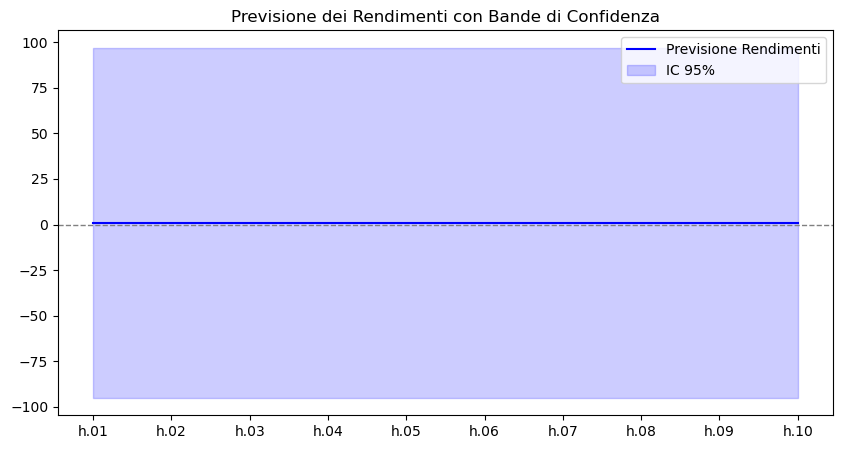

In [ ]:
model = arch_model(returns["returns"] * 100 , vol='Garch', p=1, q=1, dist='ged')
res = model.fit(disp="off")

horizon = 10
forecasts = res.forecast(start=len(returns) - horizon, horizon=horizon)

print(forecasts.mean.shape)
print(forecasts.mean.head())

mean_forecast = forecasts.mean.iloc[-1] 
variance_forecast = forecasts.variance.iloc[-1] 
std_forecast = np.sqrt(variance_forecast)  

upper_band = mean_forecast + z_score * std_forecast
lower_band = mean_forecast - z_score * std_forecast

plt.figure(figsize=(10, 5))
plt.plot(mean_forecast.index, mean_forecast, label="Previsione Rendimenti", color='blue')
plt.fill_between(mean_forecast.index, lower_band, upper_band, color='blue', alpha=0.2, label="IC 95%")
plt.axhline(y=0, linestyle='--', color='gray', linewidth=1)
plt.legend()
plt.title("Previsione dei Rendimenti con Bande di Confidenza")
plt.show()

In [31]:
res.conditional_volatility

2020-01-01    47.216448
2020-01-02    48.093157
2020-01-03    48.525909
2020-01-04    48.741013
2020-01-05    48.848294
                ...    
2022-09-22    48.955508
2022-09-23    48.955508
2022-09-24    48.955508
2022-09-25    48.955508
2022-09-26    48.955508
Freq: D, Name: cond_vol, Length: 1000, dtype: float64